In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import pygmt
import seaborn as sns


In [3]:
geo_df=pd.read_csv('../geological_map/waor_station_geology.csv')
geo_df.head(5)

,netst,stlo,stla,geometry,index_right,STATE,ORIG_LABEL,SGMC_LABEL,UNIT_LINK,UNIT_NAME,...,INDETERMIN,REF_ID,REFERENCE,GENERALIZE,DIGITAL_UR,NGMDB1,NGMDB2,NGMDB3,RuleID,FIPS_C
0,CC.ASBU,-121.368401,43.820560,POINT (-121.368401 43.82056),9310.0,OR,Qyb,Qyb;0,ORQyb;0,Youngest basalt and basaltic andesite,...,NaN,OR392,"Miller, R.J., Raines, G.L., and Connors, K.A.,...","Igneous, volcanic",https://pubs.usgs.gov/of/2003/of03-067/,https://ngmdb.usgs.gov/Prodesc/proddesc_16259.htm,NaN,NaN,2.0,41.0
1,CC.BRSP,-121.708427,45.401550,POINT (-121.708427 45.40155),5175.0,OR,Qa,Qa;0,ORQa;0,Andesite,...,NaN,OR392,"Miller, R.J., Raines, G.L., and Connors, K.A.,...","Igneous, volcanic",https://pubs.usgs.gov/of/2003/of03-067/,https://ngmdb.usgs.gov/Prodesc/proddesc_16259.htm,NaN,NaN,2.0,41.0
2,CC.CARB,-122.005409,46.988319,POINT (-122.005409 46.988319),310.0,WA,E2,EO2;0,WAEO2;0,Lower upper Eocene marine and nonmarine rocks,...,NaN,WA097,"Raines, Gary L., and Johnson, Bruce R., 1996, ...","Sedimentary, clastic",https://pubs.usgs.gov/of/1995/of95-684/,https://ngmdb.usgs.gov/Prodesc/proddesc_30777.htm,NaN,NaN,23.0,53.0
3,CC.CIHL,-121.148621,43.750969,POINT (-121.148621 43.750969),5796.0,OR,Qb,Qb;0,ORQb;0,Basalt and basaltic andesite,...,NaN,OR392,"Miller, R.J., Raines, G.L., and Connors, K.A.,...","Igneous, volcanic",https://pubs.usgs.gov/of/2003/of03-067/,https://ngmdb.usgs.gov/Prodesc/proddesc_16259.htm,NaN,NaN,2.0,41.0
4,CC.CLBH,-122.143494,42.907745,POINT (-122.143494 42.907745),5168.0,OR,Qa,Qa;0,ORQa;0,Andesite,...,NaN,OR392,"Miller, R.J., Raines, G.L., and Connors, K.A.,...","Igneous, volcanic",https://pubs.usgs.gov/of/2003/of03-067/,https://ngmdb.usgs.gov/Prodesc/proddesc_16259.htm,NaN,NaN,2.0,41.0


In [5]:
fn1='Annual_BBQ_comb.csv'
pd_pnwbb = pd.read_csv(fn1)

In [6]:
# Merging pd1 with pd2 on the 'netst' column
merged_geo = pd_pnwbb.merge(geo_df, on='netst', how='left')
merged_geo = merged_geo[merged_geo.meanb > 0.01]

# Display the merged DataFrame
# merged_geo.to_csv('merged_geo.csv', index=False)

In [7]:
# Merging pd1 with pd2 on the 'netst' column
merged_geo = pd_pnwbb.merge(geo_df, on='netst', how='left')
merged_geo=merged_geo[merged_geo.meanb > 0.01]
# merged_geo.to_csv('merged_geo.csv', index=False)



In [8]:
# -122, -121.4, 46.7, 47
MtRainer=merged_geo[(merged_geo.stlo_x >-122) & (merged_geo.stlo_x <-121.4) & (merged_geo.stla_x >46.7) & (merged_geo.stla_x <47)]
# -121.9, -121.4, 45, 45.5
MtHood=merged_geo[(merged_geo.stlo_x >-121.9) & (merged_geo.stlo_x <-121.4) & (merged_geo.stla_x >45) & (merged_geo.stla_x <45.5)]
# -122.4, -121.9, 46, 46.4
MtStHelens=merged_geo[(merged_geo.stlo_x >-122.5) & (merged_geo.stlo_x <-121.9) & (merged_geo.stla_x >46) & (merged_geo.stla_x <46.4)]


In [9]:
merged_geo=MtStHelens

coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


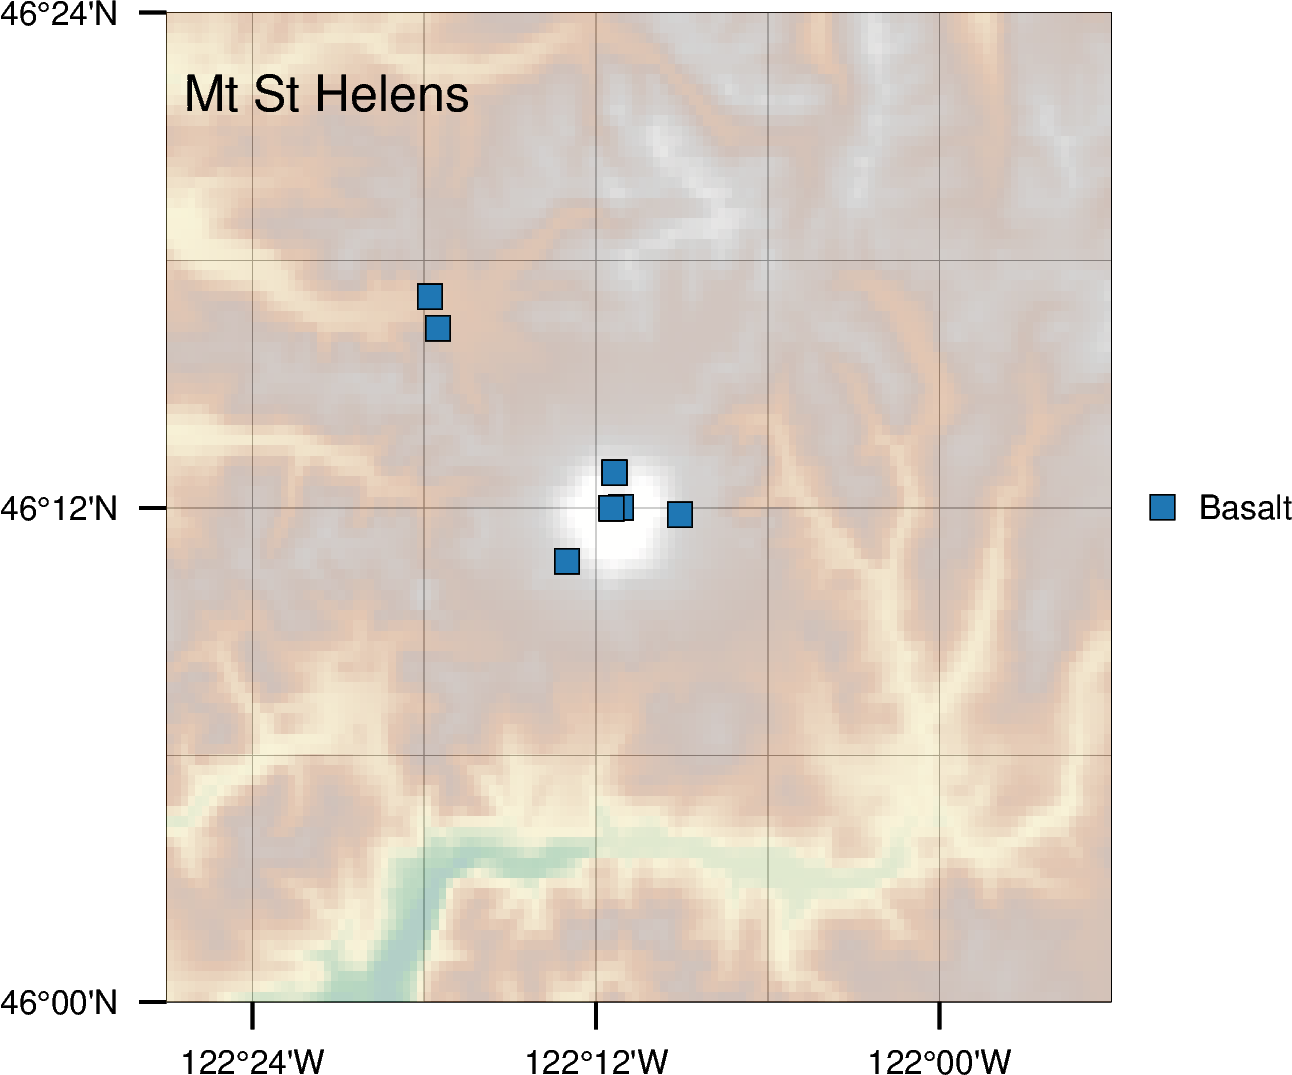

In [10]:
import pandas as pd
import pygmt
from matplotlib.colors import to_hex

# Load CSV data
df = MtStHelens
df['MAJOR1'] = df['MAJOR1'].astype(str)  # Ensure categorical variable

region=[-122.45, -121.9, 46, 46.4]
proj='M4c'
# Initialize the figure
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
 
# Plot the basemap
fig.basemap(region=region,  projection=proj, frame="a0.2g0.1", )
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
fig.grdimage(grid=grid, projection=proj, transparency=70, cmap='geo')
fig.text(x=-122.44,y=46.36,text=f'Mt St Helens', font="6p,Helvetica,0", no_clip=True, justify="BL" )

fig.coast(region=region, projection=proj,  resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)
# Plot each unique NA_L3KEY as a different color
unique_keys = df['MAJOR1'].unique()

# Get colormap
cmap = plt.get_cmap('tab20', len(unique_keys))
# Plot each unique NA_L3NAME with corresponding color from the colormap
for i, key in enumerate(unique_keys):
    subset = df[df['MAJOR1'] == key]
    
    # Check if subset is not empty
    if not subset.empty and len(subset) > 0:
        color = to_hex(cmap(i)[:3])  # Get the color from the colormap
        # print(f"Plotting {key} with color {color}")
        # Plot with the same length for x and y
        fig.plot(
            x=subset['stlo_x'],
            y=subset['stla_x'],
            style="s0.15c",  # Circle style with size
            pen="0.1p,black",
            fill=color,  # Use RGB values; color is returned as (R, G, B, A)
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR", )
fig.show(dpi=600)
fig.savefig('MAP_MtStHelens.png')


coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
/tmp/ipykernel_515380/3094589714.py:15: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'series' instead.
  pygmt.makecpt(cmap='viridis', T='0/3.5', continuous=True, log=True)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


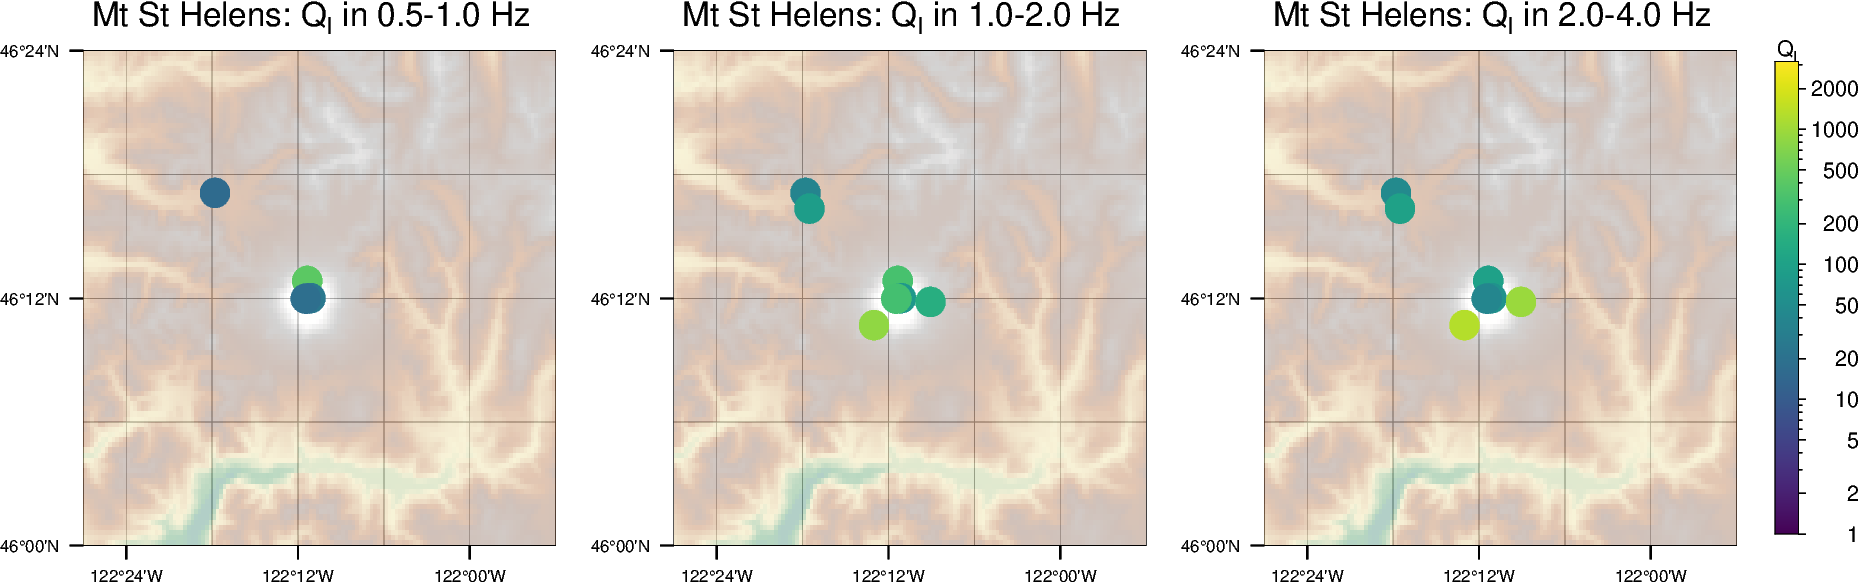

In [20]:

fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.15p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
    
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
for k, freq in enumerate(MtStHelens.fband.unique()):
    single_pnwbb=MtStHelens.loc[MtStHelens.fband == freq]
    fig.basemap(region=region,  projection=proj, frame="a0.2g0.1", )
    grid = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
    fig.grdimage(grid=grid, projection=proj, transparency=70, cmap='geo')
   
    fig.coast(region=region, projection=proj,  resolution="f", borders="2/0.05p",
                water='lightblue', shorelines='0/0.1p',)

    # Make a logarithmic color palette
    pygmt.makecpt(cmap='viridis', T='0/3.5', continuous=True, log=True)

    # seismic stations
    # fig.plot(x=single_pnwbb.stlo, y=single_pnwbb.stla, size=0.05*single_pnwbb.ncount , cmap=True, style = "cc", fill=single_pnwbb.meanQ)    
    fig.plot(x=single_pnwbb.stlo_x, y=single_pnwbb.stla_x, cmap=True, style = "c0.1i", fill=single_pnwbb.meanQ)    
    fig.text(x=-122.44,y=46.42,text=f'Mt St Helens: Q@-I@- in {freq} Hz', font="8p,Helvetica,0", no_clip=True, justify="BL" )
    
    fig.shift_origin(xshift="5c")
pygmt.config(FONT_ANNOT='10p',)
fig.shift_origin(xshift="-5.5c")
fig.colorbar( cmap=True, log=True,   position="JRM+w4c/0.2c",     frame=["a2f3", "y+lQ@-I@-"],)

# fig.legend(position='JTL+jTL+o0.2c', box='+gwhite+p0.5p', )
fig.show()
fname='MAP_Q_StHelens.png'
fig.savefig(fname, dpi=600)

In [12]:
# geo_filtered = merged_geo[merged_geo['MAJOR1'].map(merged_geo['MAJOR1'].value_counts()) > 3]
geo_filtered=MtStHelens

Basalt        fband    netst      stlo_x     stla_x     meanb        meanQ  ncount  \
48   0.5-1.0  CC.VALT -122.189247  46.214218  0.102500   413.119500       8   
178  0.5-1.0   CC.REM -122.185501  46.200199  0.187500    25.285500       4   
180  0.5-1.0   CC.SEP -122.190857  46.199780  0.257500    18.405500       4   
245  0.5-1.0   CC.MAR -122.296669  46.285320  0.290000    16.250000       1   
322  1.0-2.0  CC.VALT -122.189247  46.214218  0.267500   300.102125       8   
400  1.0-2.0  CC.SWF2 -122.216766  46.178349  0.025556   844.739556       9   
452  1.0-2.0   CC.REM -122.185501  46.200199  0.130000    74.224500       4   
454  1.0-2.0   CC.SEP -122.190857  46.199780  0.220000   285.543000       4   
519  1.0-2.0   CC.MAR -122.296669  46.285320  0.250000    37.699000       1   
520  1.0-2.0  CC.UNFR -122.292099  46.272610  0.110000    85.680000       1   
529  1.0-2.0   UW.EDM -122.151207  46.197170  0.060000   157.080000       1   
596  2.0-4.0  CC.VALT -122.189247  46.214218 

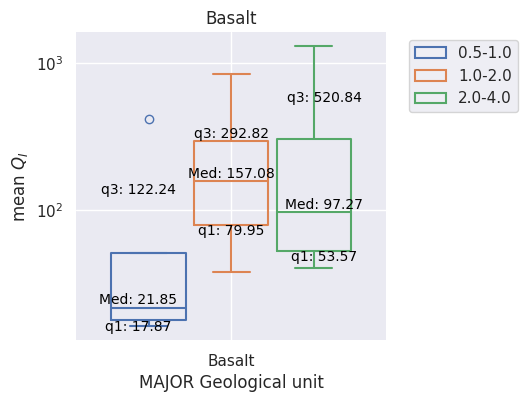

In [13]:
sns.set_theme()
for rock in geo_filtered['MAJOR1'].unique():
    data_geo = geo_filtered[(geo_filtered['MAJOR1'] == rock) & (geo_filtered['meanb'] > 0.01)]
    print(rock, data_geo)
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(4,4))
    ax.set_yscale("log")
    sns.boxplot(data=data_geo, y="meanQ", x="MAJOR1", hue="fband", gap=0.1,
                 fill=False,
                )
    # sns.stripplot(data_geo, x="GENERALIZE", y="meanQ", hue="fband", size=2,)
    # sns.violinplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", fill=False,)
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        med = data_in['meanQ'].median()
        q1 = data_in['meanQ'].quantile(0.25)
        q3 = data_in['meanQ'].quantile(0.75)
        
        # Get the position on the x-axis for the current category
        xpos = n*0.3-0.3
        
        # Plot the mean and quartiles as text on the plot
        ax.text(xpos, med, f'Med: {med:.2f}', ha='center', va='bottom', color='black', fontsize=10)
        ax.text(xpos, q1, f'q1: {q1:.2f}', ha='center', va='top', color='black', fontsize=10)
        ax.text(xpos, q3, f'q3: {q3:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set(ylabel="mean $Q_I$", xlabel="MAJOR Geological unit", title=f'{rock}')
    sns.despine(trim=True, left=True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1), ncol=1)
    # plt.gcf().set_dpi(300)
    plt.show()


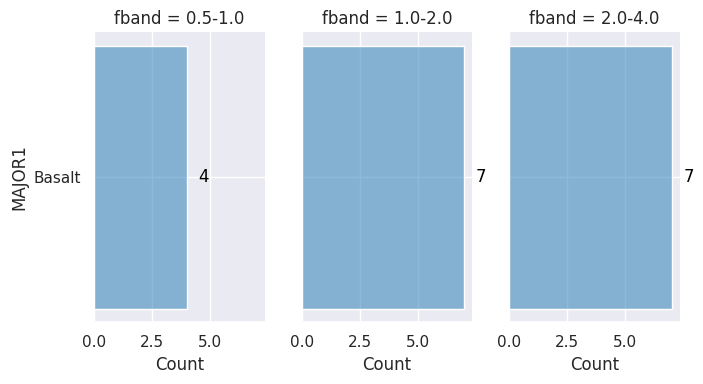

In [14]:
g= sns.displot(
    geo_filtered, y="MAJOR1", hue="MAJOR1", col="fband", bins=1,
    binwidth=3, height=4, facet_kws=dict(margin_titles=True),legend=False,
    aspect=0.6, palette="tab20"
)
original_order = geo_filtered['MAJOR1'].unique()
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['MAJOR1'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 0.5, i, f'{int(count)}', color='black', ha='left', va='center')
plt.tight_layout()


coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Plotting Basalt with color #1f77b4


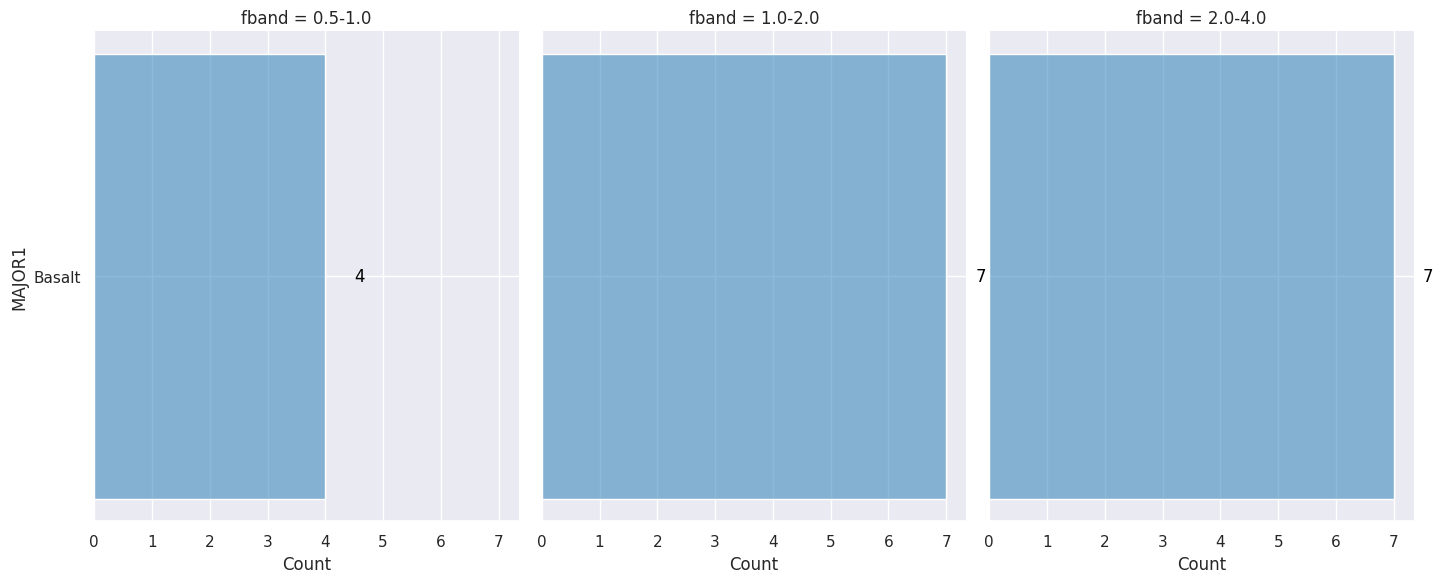

In [15]:
import pandas as pd
import pygmt
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

# Step 1: Ensure 'GENERALIZE' is in its original order
original_order = geo_filtered['MAJOR1'].unique()
geo_filtered['MAJOR1'] = pd.Categorical(geo_filtered['MAJOR1'], categories=original_order, ordered=True)

# Step 2: Create a fixed color map dictionary based on the original order using a consistent color palette
cmap = plt.get_cmap('tab20', len(original_order))
color_map = {category: to_hex(cmap(i)[:3]) for i, category in enumerate(original_order)}

# Step 3: Plotting with Seaborn using the fixed color map
import seaborn as sns
g = sns.displot(
    geo_filtered, y="MAJOR1", hue="MAJOR1", col="fband", bins=1,
    binwidth=3, height=6, facet_kws=dict(margin_titles=True), legend=False,
    aspect=0.8, palette=color_map  # Use the fixed color map here
)
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['MAJOR1'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 0.5, i, f'{int(count)}', color='black', ha='left', va='center')
        
# Step 4: Now plot the map with PyGMT using the same color mapping
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN='0.01p,150', MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p')

# Plot the basemap
fig.basemap(region=region, projection=proj, frame="a2g1")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )
# Add coastlines and water
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p", water='lightblue', shorelines='0/0.1p')

# Plot each unique GENERALIZE category using the color map dictionary
for key in original_order:
    subset = geo_filtered[geo_filtered['MAJOR1'] == key]
    
    # Check if subset is not empty
    if not subset.empty:
        color = color_map[key]  # Use the fixed color for the category
        print(f"Plotting {key} with color {color}")
        fig.plot(
            x=subset['stlo_x'],
            y=subset['stla_x'],
            style="s0.15c",  # Square style with size
            pen="0.1p,black",
            fill=color,
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR",)
# fig.savefig(fname='GEOunitmap_histo.png' , dpi=600)
# plt.savefig(fname='GEOunit_histo.png' , dpi=600)

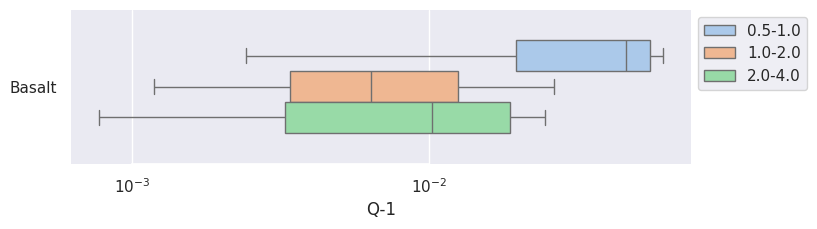

In [16]:

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 2))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    geo_filtered, x="Q-1", y="MAJOR1", hue="fband",
    order=geo_filtered['MAJOR1'].value_counts().index,
    whis=[0, 100], width=.6, palette="pastel"
    
)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), ncol=1)

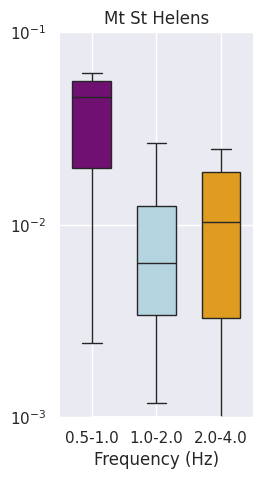

In [17]:
colors=['purple','lightblue','orange']
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(2.5, 5))
ax.set_yscale("log")
ax.set_ylim(0.001,0.1)
# Plot the orbital period with horizontal boxes
sns.boxplot(
    geo_filtered, y="Q-1", x="fband", hue="fband",
    whis=[0, 100], width=.6, palette=colors
    
)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="",xlabel='Frequency (Hz)')
ax.set_title('Mt St Helens')
sns.despine(trim=True, left=True)
# ax.legend(loc='upper right', bbox_to_anchor=(2, 1), ncol=1)

KeyError: 'Vs_0'

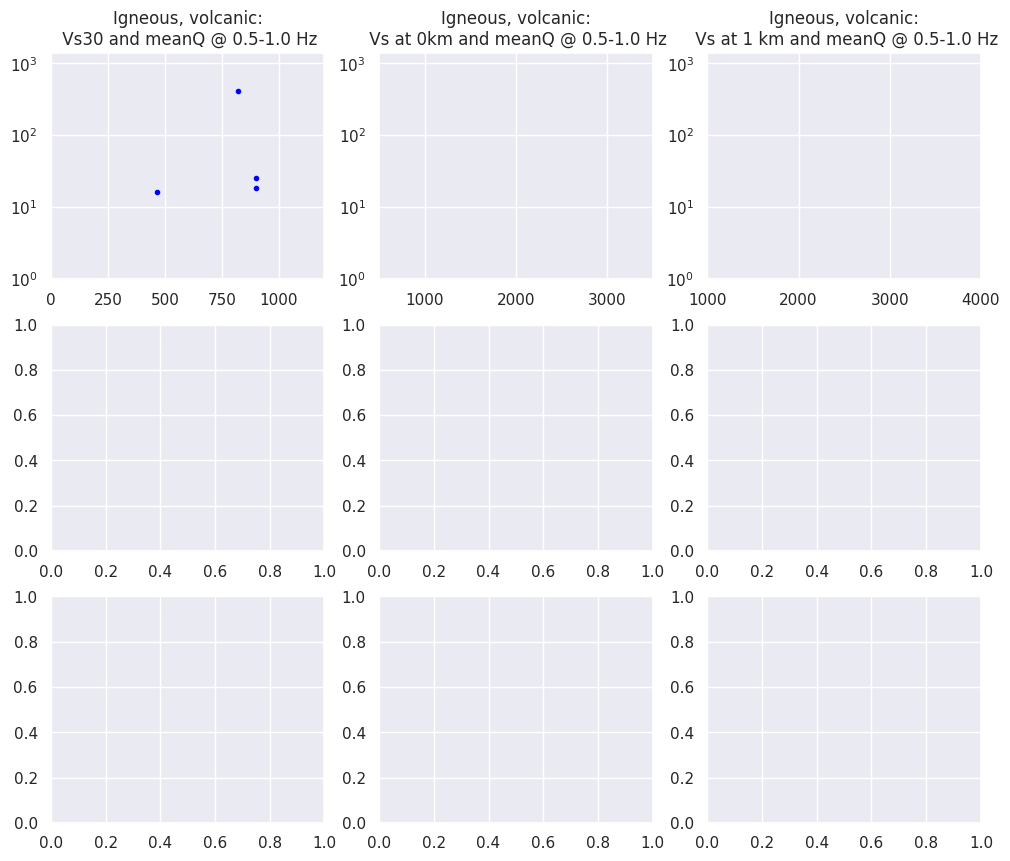

In [18]:
import numpy as np

for rock in geo_filtered['GENERALIZE'].unique():
    data_geo = geo_filtered[geo_filtered['GENERALIZE'] == rock]
    data_geo = data_geo[(data_geo['GENERALIZE']== rock) & (data_geo['meanb'] > 0.01)]

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(3,3,figsize=(12,10))

    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        for k in range(3):
            ax[n,k].set_yscale("log")
            ax[n,k].set_ylim(1,1400)
        ax[n,0].set_xlim(0,1200)
        ax[n,1].set_xlim(500,3500)
        ax[n,2].set_xlim(1000,4000)
        
        ax[n,0].set_title(f'{rock}:\n Vs30 and meanQ @ {fb} Hz')
        ax[n,1].set_title(f'{rock}:\n Vs at 0km and meanQ @ {fb} Hz')
        ax[n,2].set_title(f'{rock}:\n Vs at 1 km and meanQ @ {fb} Hz')
        
        ax[n,0].plot( data_in['vs30']     ,data_in['meanQ'],'.', label=f'vs30 ', color='blue')        
        ax[n,1].plot( data_in['Vs_0']*1000,data_in['meanQ'], '.', label=f'Vs at 0 km depth ', color='red')
        ax[n,2].plot( data_in['Vs_1']*1000,data_in['meanQ'], '.', label=f'Vs at 1 km depth ', color='green')

        R0=np.corrcoef(data_in['vs30'],data_in['meanQ'])[0,1]
        R1=np.corrcoef(data_in['Vs_0'],data_in['meanQ'])[0,1]
        R2=np.corrcoef(data_in['Vs_1'],data_in['meanQ'])[0,1]

        ax[n,0].text(0.75,0.91,f'$R^2$={R0**2:.2f}',transform=ax[n,0].transAxes)
        ax[n,1].text(0.75,0.91,f'$R^2$={R1**2:.2f}',transform=ax[n,1].transAxes)
        ax[n,2].text(0.75,0.91,f'$R^2$={R2**2:.2f}',transform=ax[n,2].transAxes)
        

    ax[0,0].set(ylabel="mean $Q_I$", xlabel='Velocity (m/s)')
    plt.tight_layout()
    
    


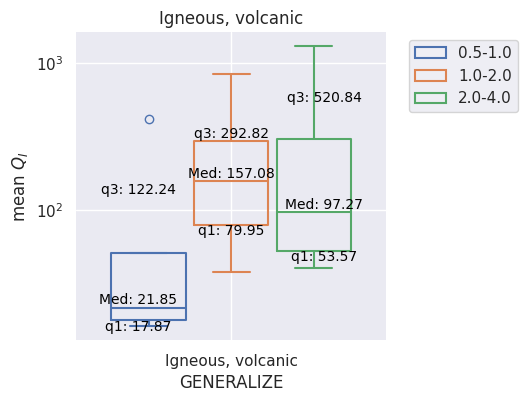

In [ ]:

for rock in geo_filtered['GENERALIZE'].unique():
    data_geo = geo_filtered[geo_filtered['GENERALIZE'] == rock]
    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(4,4))
    ax.set_yscale("log")
    sns.boxplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", gap=0.1,
                 fill=False,
                )
    # sns.stripplot(data_geo, x="GENERALIZE", y="meanQ", hue="fband", size=2,)
    # sns.violinplot(data=data_geo, y="meanQ", x="GENERALIZE", hue="fband", fill=False,)
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        med = data_in['meanQ'].median()
        q1 = data_in['meanQ'].quantile(0.25)
        q3 = data_in['meanQ'].quantile(0.75)
        
        # Get the position on the x-axis for the current category
        xpos = n*0.3-0.3
        
        # Plot the mean and quartiles as text on the plot
        ax.text(xpos, med, f'Med: {med:.2f}', ha='center', va='bottom', color='black', fontsize=10)
        ax.text(xpos, q1, f'q1: {q1:.2f}', ha='center', va='top', color='black', fontsize=10)
        ax.text(xpos, q3, f'q3: {q3:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    ax.set(ylabel="mean $Q_I$", xlabel="GENERALIZE", title=f'{rock}')
    sns.despine(trim=True, left=True)
    ax.legend(loc='upper right', bbox_to_anchor=(1.45, 1), ncol=1)
    # plt.gcf().set_dpi(300)
    plt.show()


/home/kffeng/miniconda/envs/codetest/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/kffeng/miniconda/envs/codetest/lib/python3.9/site-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


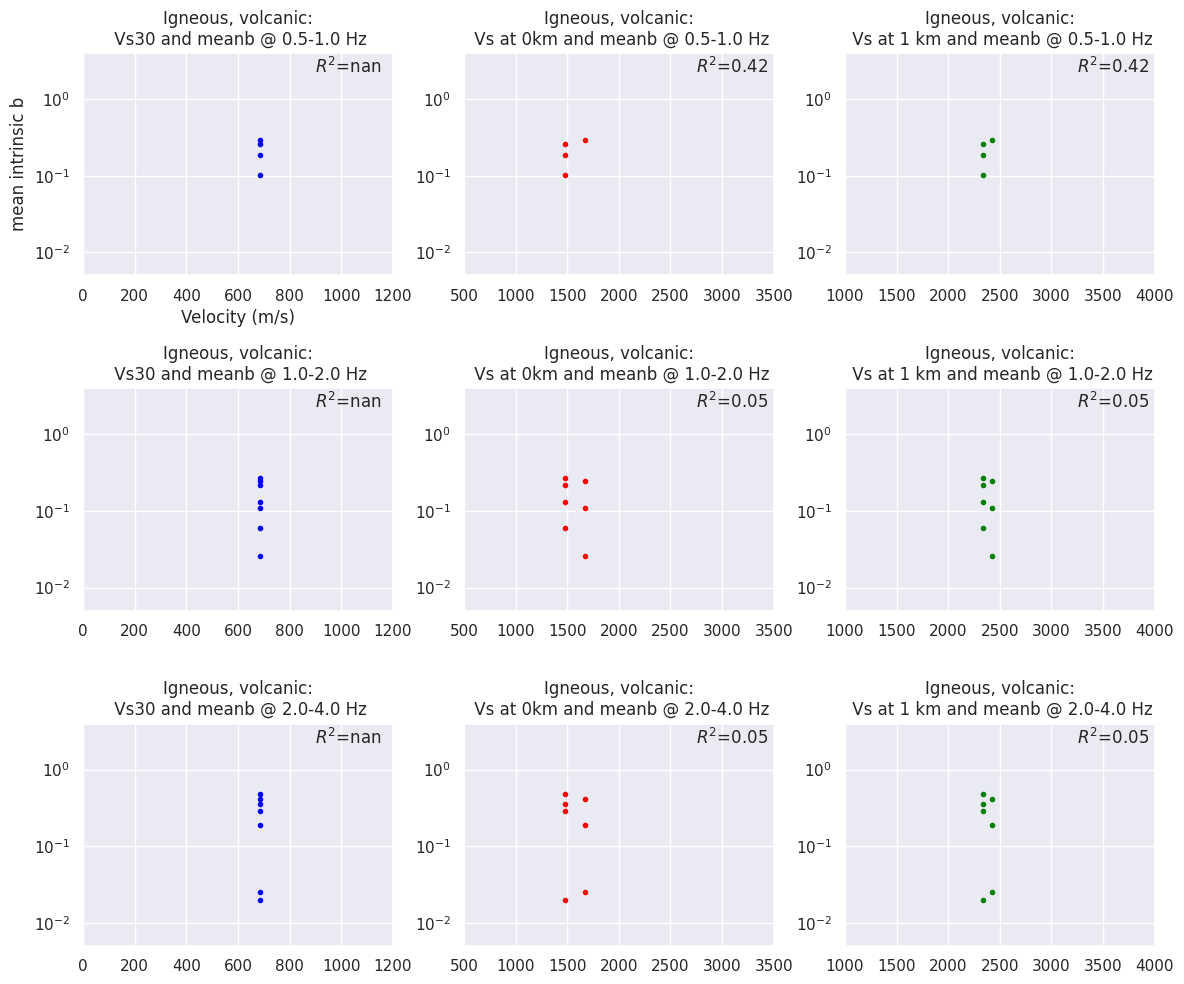

In [ ]:

for rock in geo_filtered['GENERALIZE'].unique():
    data_geo = geo_filtered[geo_filtered['GENERALIZE'] == rock]
    data_geo = data_geo[(data_geo['GENERALIZE']== rock) & (data_geo['meanb']!=0.01)]

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(3,3,figsize=(12,10))

    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        for k in range(3):
            ax[n,k].set_yscale("log")
            ax[n,k].set_ylim(0.005,4)
        ax[n,0].set_xlim(0,1200)
        ax[n,1].set_xlim(500,3500)
        ax[n,2].set_xlim(1000,4000)
        
        ax[n,0].set_title(f'{rock}:\n Vs30 and meanb @ {fb} Hz')
        ax[n,1].set_title(f'{rock}:\n Vs at 0km and meanb @ {fb} Hz')
        ax[n,2].set_title(f'{rock}:\n Vs at 1 km and meanb @ {fb} Hz')
       
        ax[n,0].plot( data_in['vs30']     ,data_in['meanb'],'.', label=f'vs30 ', color='blue')
        ax[n,1].plot( data_in['Vs_0']*1000,data_in['meanb'], '.', label=f'Vs at 0 km depth ', color='red')
        ax[n,2].plot( data_in['Vs_1']*1000,data_in['meanb'], '.', label=f'Vs at 1 km depth ', color='green')
        
        R0=np.corrcoef(data_in['vs30'],data_in['meanb'])[0,1]
        R1=np.corrcoef(data_in['Vs_0'],data_in['meanb'])[0,1]
        R2=np.corrcoef(data_in['Vs_1'],data_in['meanb'])[0,1]

        ax[n,0].text(0.75,0.91,f'$R^2$={R0**2:.2f}',transform=ax[n,0].transAxes)
        ax[n,1].text(0.75,0.91,f'$R^2$={R1**2:.2f}',transform=ax[n,1].transAxes)
        ax[n,2].text(0.75,0.91,f'$R^2$={R2**2:.2f}',transform=ax[n,2].transAxes)


    ax[0,0].set(ylabel="mean intrinsic b", xlabel='Velocity (m/s)')
    plt.tight_layout()
    
    


In [ ]:
print(geo_filtered['MAJOR1'].unique().tolist())

['Basalt']


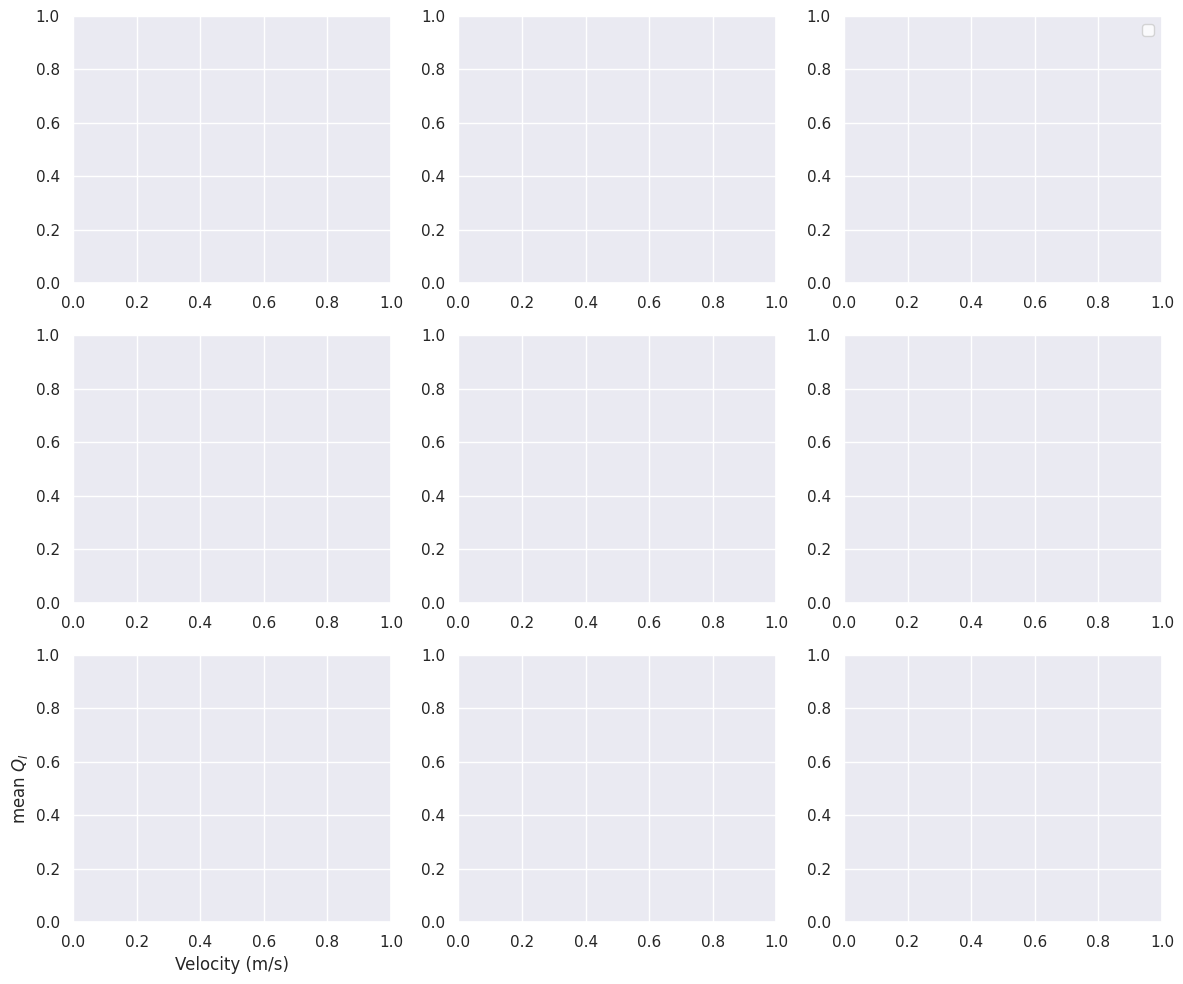

In [ ]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(3,3,figsize=(12,10))

selected_rock = ['Gravel','Clay', 'Sand','Basaltic-andesite']
# selected_rock = ['Gravel','Clay', 'Sand','Sandstone']
colors=['blue','red','black','lime']
# colors=['blue','red','black','magenta']
for ktype, rock in enumerate(selected_rock):
    data_geo = geo_filtered[geo_filtered['MAJOR1'] == rock]
    data_geo = data_geo[data_geo['MAJOR1']== rock]
    color=colors[ktype]
    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        for k in range(3):
            ax[n,k].set_yscale("log")
            ax[n,k].set_ylim(5,1400)
        ax[n,0].set_xlim(0,1200)
        ax[n,1].set_xlim(500,3500)
        ax[n,2].set_xlim(1000,4000)
        
        ax[n,0].set_title(f'meanQ and Vs30 and @ {fb} Hz')
        ax[n,1].set_title(f'meanQ and Vs (0 km) @ {fb} Hz')
        ax[n,2].set_title(f'meanQ and Vs (1 km) @ {fb} Hz')
        
        ax[n,0].plot( data_in['vs30']     ,data_in['meanQ'],'.', label=f'vs30 ', color=color)
        ax[n,1].plot( data_in['Vs_0']*1000,data_in['meanQ'], '.', label=f'Vs at 0 km depth ', color=color)
        ax[n,2].plot( data_in['Vs_1']*1000,data_in['meanQ'], '.', label=f'Vs at 1 km depth ',  color=color)
        
        
        R0=np.corrcoef(data_in['vs30'],data_in['meanQ'])[0,1]
        R1=np.corrcoef(data_in['Vs_0'],data_in['meanQ'])[0,1]
        R2=np.corrcoef(data_in['Vs_1'],data_in['meanQ'])[0,1]

        ax[n,0].text(0.75,0.91-0.1*ktype,f'$R^2$={R0**2:.2f}',transform=ax[n,0].transAxes, color=color)
        ax[n,1].text(0.75,0.91-0.1*ktype,f'$R^2$={R1**2:.2f}',transform=ax[n,1].transAxes, color=color)
        ax[n,2].text(0.75,0.91-0.1*ktype,f'$R^2$={R2**2:.2f}',transform=ax[n,2].transAxes, color=color)

    ax[2,0].set(ylabel="mean $Q_I$", xlabel='Velocity (m/s)')
    ax[0,2].legend(selected_rock, ).get_frame().set_facecolor('white')
    plt.tight_layout()



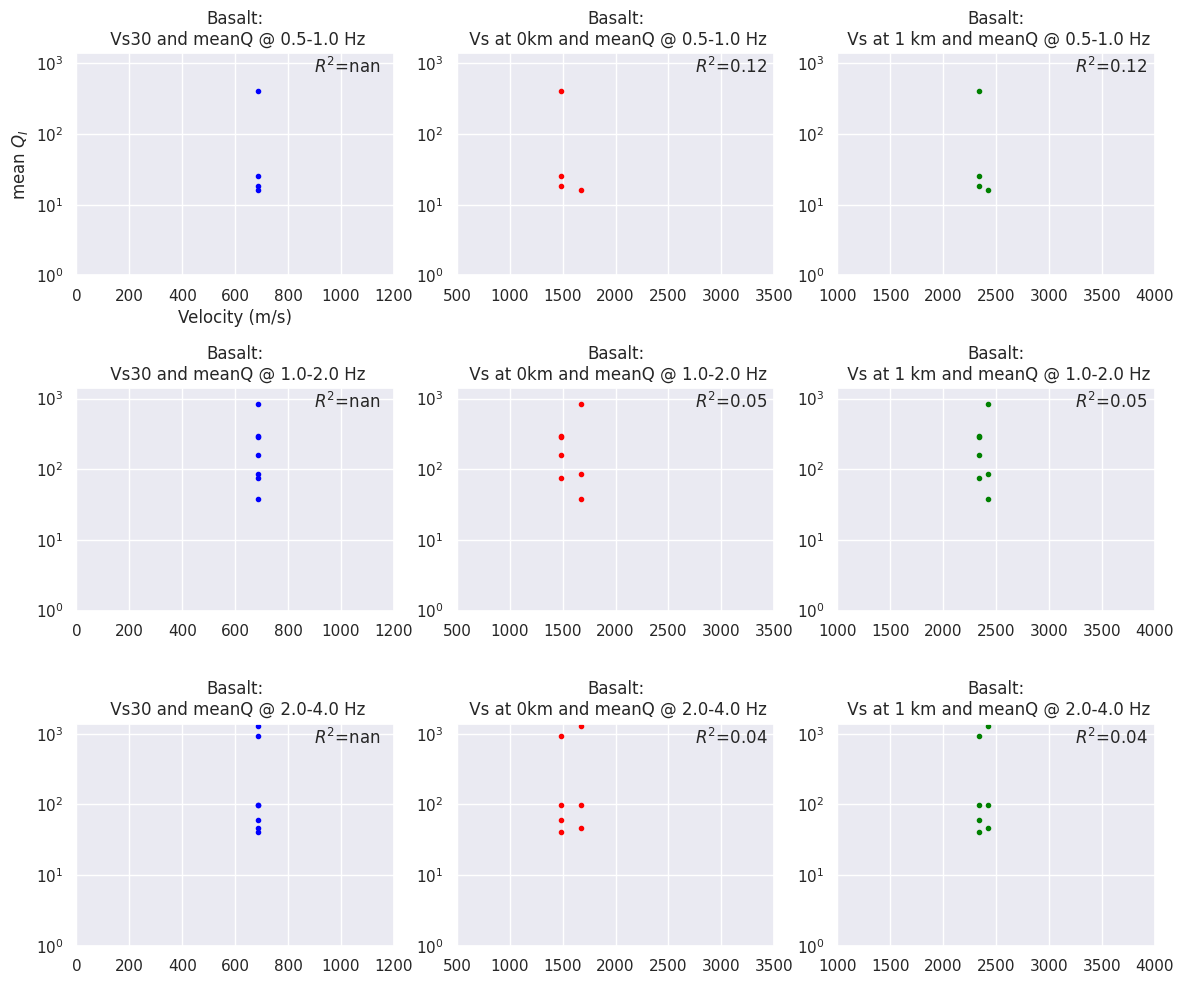

In [ ]:

for rock in geo_filtered['MAJOR1'].unique():
    data_geo = geo_filtered[geo_filtered['MAJOR1'] == rock]
    data_geo = data_geo[data_geo['MAJOR1']== rock]

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(3,3,figsize=(12,10))

    for n,fb in enumerate(data_geo.fband.unique()):
        data_in = data_geo[data_geo['fband'] == fb]
        for k in range(3):
            ax[n,k].set_yscale("log")
            ax[n,k].set_ylim(1,1400)
        ax[n,0].set_xlim(0,1200)
        ax[n,1].set_xlim(500,3500)
        ax[n,2].set_xlim(1000,4000)
        
        ax[n,0].set_title(f'{rock}:\n Vs30 and meanQ @ {fb} Hz')
        ax[n,1].set_title(f'{rock}:\n Vs at 0km and meanQ @ {fb} Hz')
        ax[n,2].set_title(f'{rock}:\n Vs at 1 km and meanQ @ {fb} Hz')
        
        ax[n,0].plot( data_in['vs30']     ,data_in['meanQ'],'.', label=f'vs30 ', color='blue')
        ax[n,1].plot( data_in['Vs_0']*1000,data_in['meanQ'], '.', label=f'Vs at 0 km depth ', color='red')
        ax[n,2].plot( data_in['Vs_1']*1000,data_in['meanQ'], '.', label=f'Vs at 1 km depth ', color='green')
        
        
        R0=np.corrcoef(data_in['vs30'],data_in['meanQ'])[0,1]
        R1=np.corrcoef(data_in['Vs_0'],data_in['meanQ'])[0,1]
        R2=np.corrcoef(data_in['Vs_1'],data_in['meanQ'])[0,1]

        ax[n,0].text(0.75,0.91,f'$R^2$={R0**2:.2f}',transform=ax[n,0].transAxes)
        ax[n,1].text(0.75,0.91,f'$R^2$={R1**2:.2f}',transform=ax[n,1].transAxes)
        ax[n,2].text(0.75,0.91,f'$R^2$={R2**2:.2f}',transform=ax[n,2].transAxes)

    ax[0,0].set(ylabel="mean $Q_I$", xlabel='Velocity (m/s)')
    plt.tight_layout()
    
    


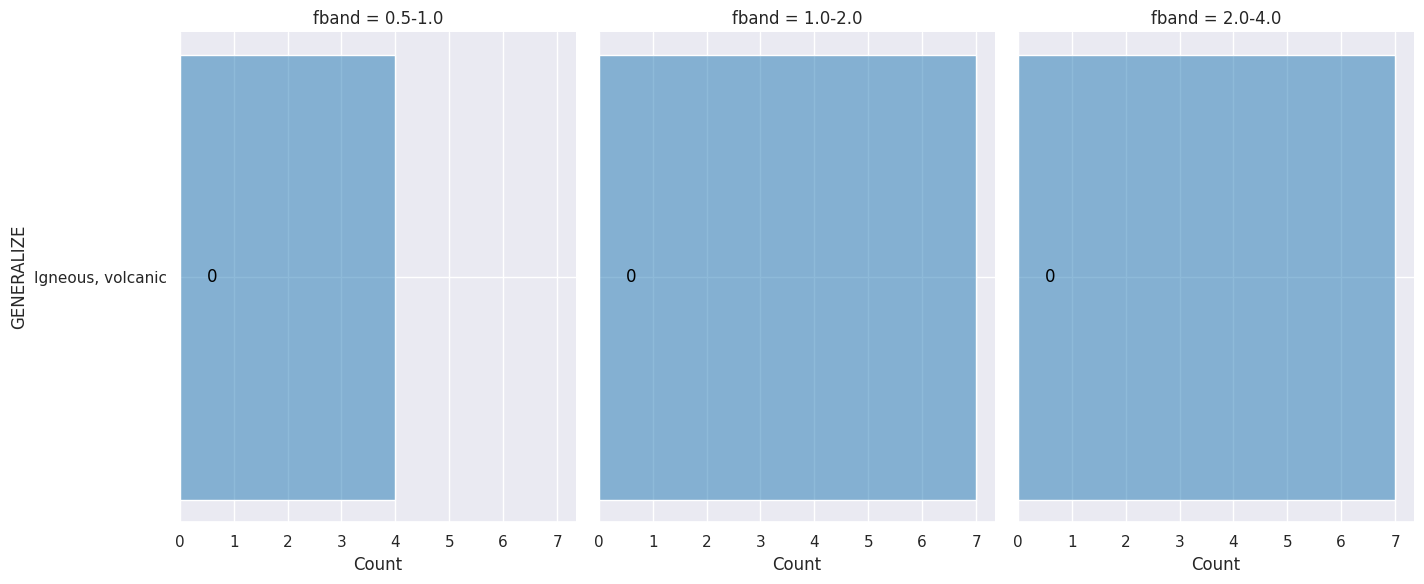

In [ ]:

g= sns.displot(
    geo_filtered, y="GENERALIZE", hue="GENERALIZE", col="fband", bins=1,
    binwidth=3, height=6, facet_kws=dict(margin_titles=True),legend=False,
    aspect=0.8, palette='tab20', 
)
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['GENERALIZE'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 0.5, i, f'{int(count)}', color='black', ha='left', va='center')

plt.tight_layout()

coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.


Plotting Igneous, volcanic with color #8dd3c7


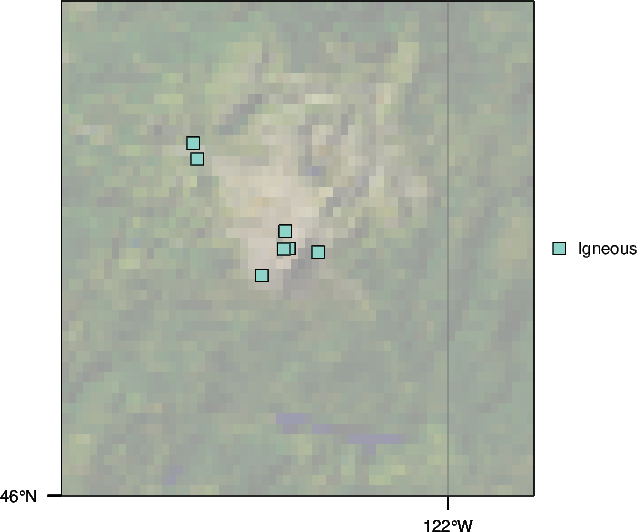

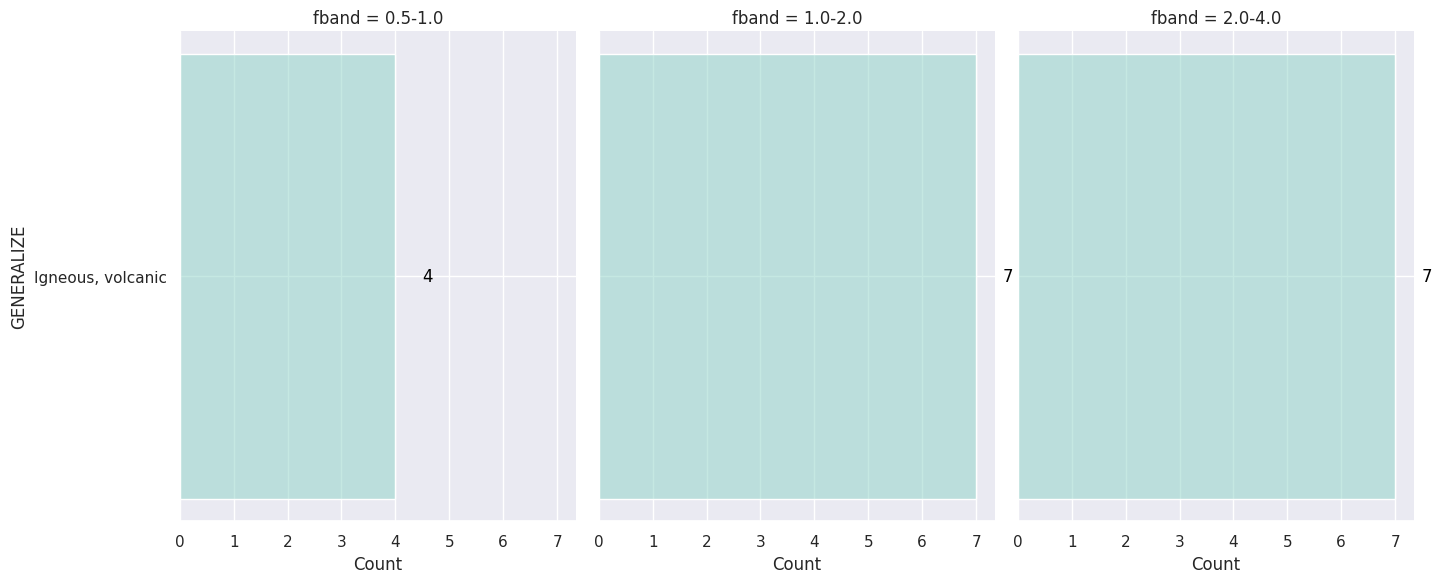

In [ ]:
import pandas as pd
import pygmt
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

# Step 1: Ensure 'GENERALIZE' is in its original order
original_order = geo_filtered['GENERALIZE'].unique()
geo_filtered['GENERALIZE'] = pd.Categorical(geo_filtered['GENERALIZE'], categories=original_order, ordered=True)

# Step 2: Create a fixed color map dictionary based on the original order using a consistent color palette
cmap = plt.get_cmap('Set3', len(original_order))
color_map = {category: to_hex(cmap(i)[:3]) for i, category in enumerate(original_order)}

# Step 3: Plotting with Seaborn using the fixed color map
import seaborn as sns
g = sns.displot(
    geo_filtered, y="GENERALIZE", hue="GENERALIZE", col="fband", bins=1,
    binwidth=3, height=6, facet_kws=dict(margin_titles=True), legend=False,
    aspect=0.8, palette=color_map  # Use the fixed color map here
)
# Loop over each facet and add count annotations
for ax in g.axes.flat:
    # Get the name of the facet (fband) from the title and filter the data for each facet
    facet_title = ax.get_title().split(" = ")[-1]  # Extracts the facet title after 'fband = '
    data_facet = geo_filtered[geo_filtered['fband'] == facet_title]
    
    # Count occurrences for each category in GENERALIZE, preserving order
    counts = data_facet['GENERALIZE'].value_counts().reindex(original_order).fillna(0)

    # Add text for each category's count
    for i, (category, count) in enumerate(counts.items()):
        ax.text(count + 0.5, i, f'{int(count)}', color='black', ha='left', va='center')
        
# Step 4: Now plot the map with PyGMT using the same color mapping
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN='0.01p,150', MAP_FRAME_PEN='0.05p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p')

# Plot the basemap
fig.basemap(region=region, projection=proj, frame="a2g1")
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=60, )
# Add coastlines and water
fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p", water='lightblue', shorelines='0/0.1p')

# Plot each unique GENERALIZE category using the color map dictionary
for key in original_order:
    subset = geo_filtered[geo_filtered['GENERALIZE'] == key]
    
    # Check if subset is not empty
    if not subset.empty:
        color = color_map[key]  # Use the fixed color for the category
        print(f"Plotting {key} with color {color}")
        fig.plot(
            x=subset['stlo_x'],
            y=subset['stla_x'],
            style="s0.15c",  # Square style with size
            pen="0.1p,black",
            fill=color,
            label=key
        )
    else:
        print(f"No data to plot for {key}")

# Add a legend
fig.legend(position="JMR",)
fig.show()
# fig.savefig(fname='GEOgenermap_histo.png' , dpi=600)
# plt.savefig(fname='GEOgener_histo.png' , dpi=600)

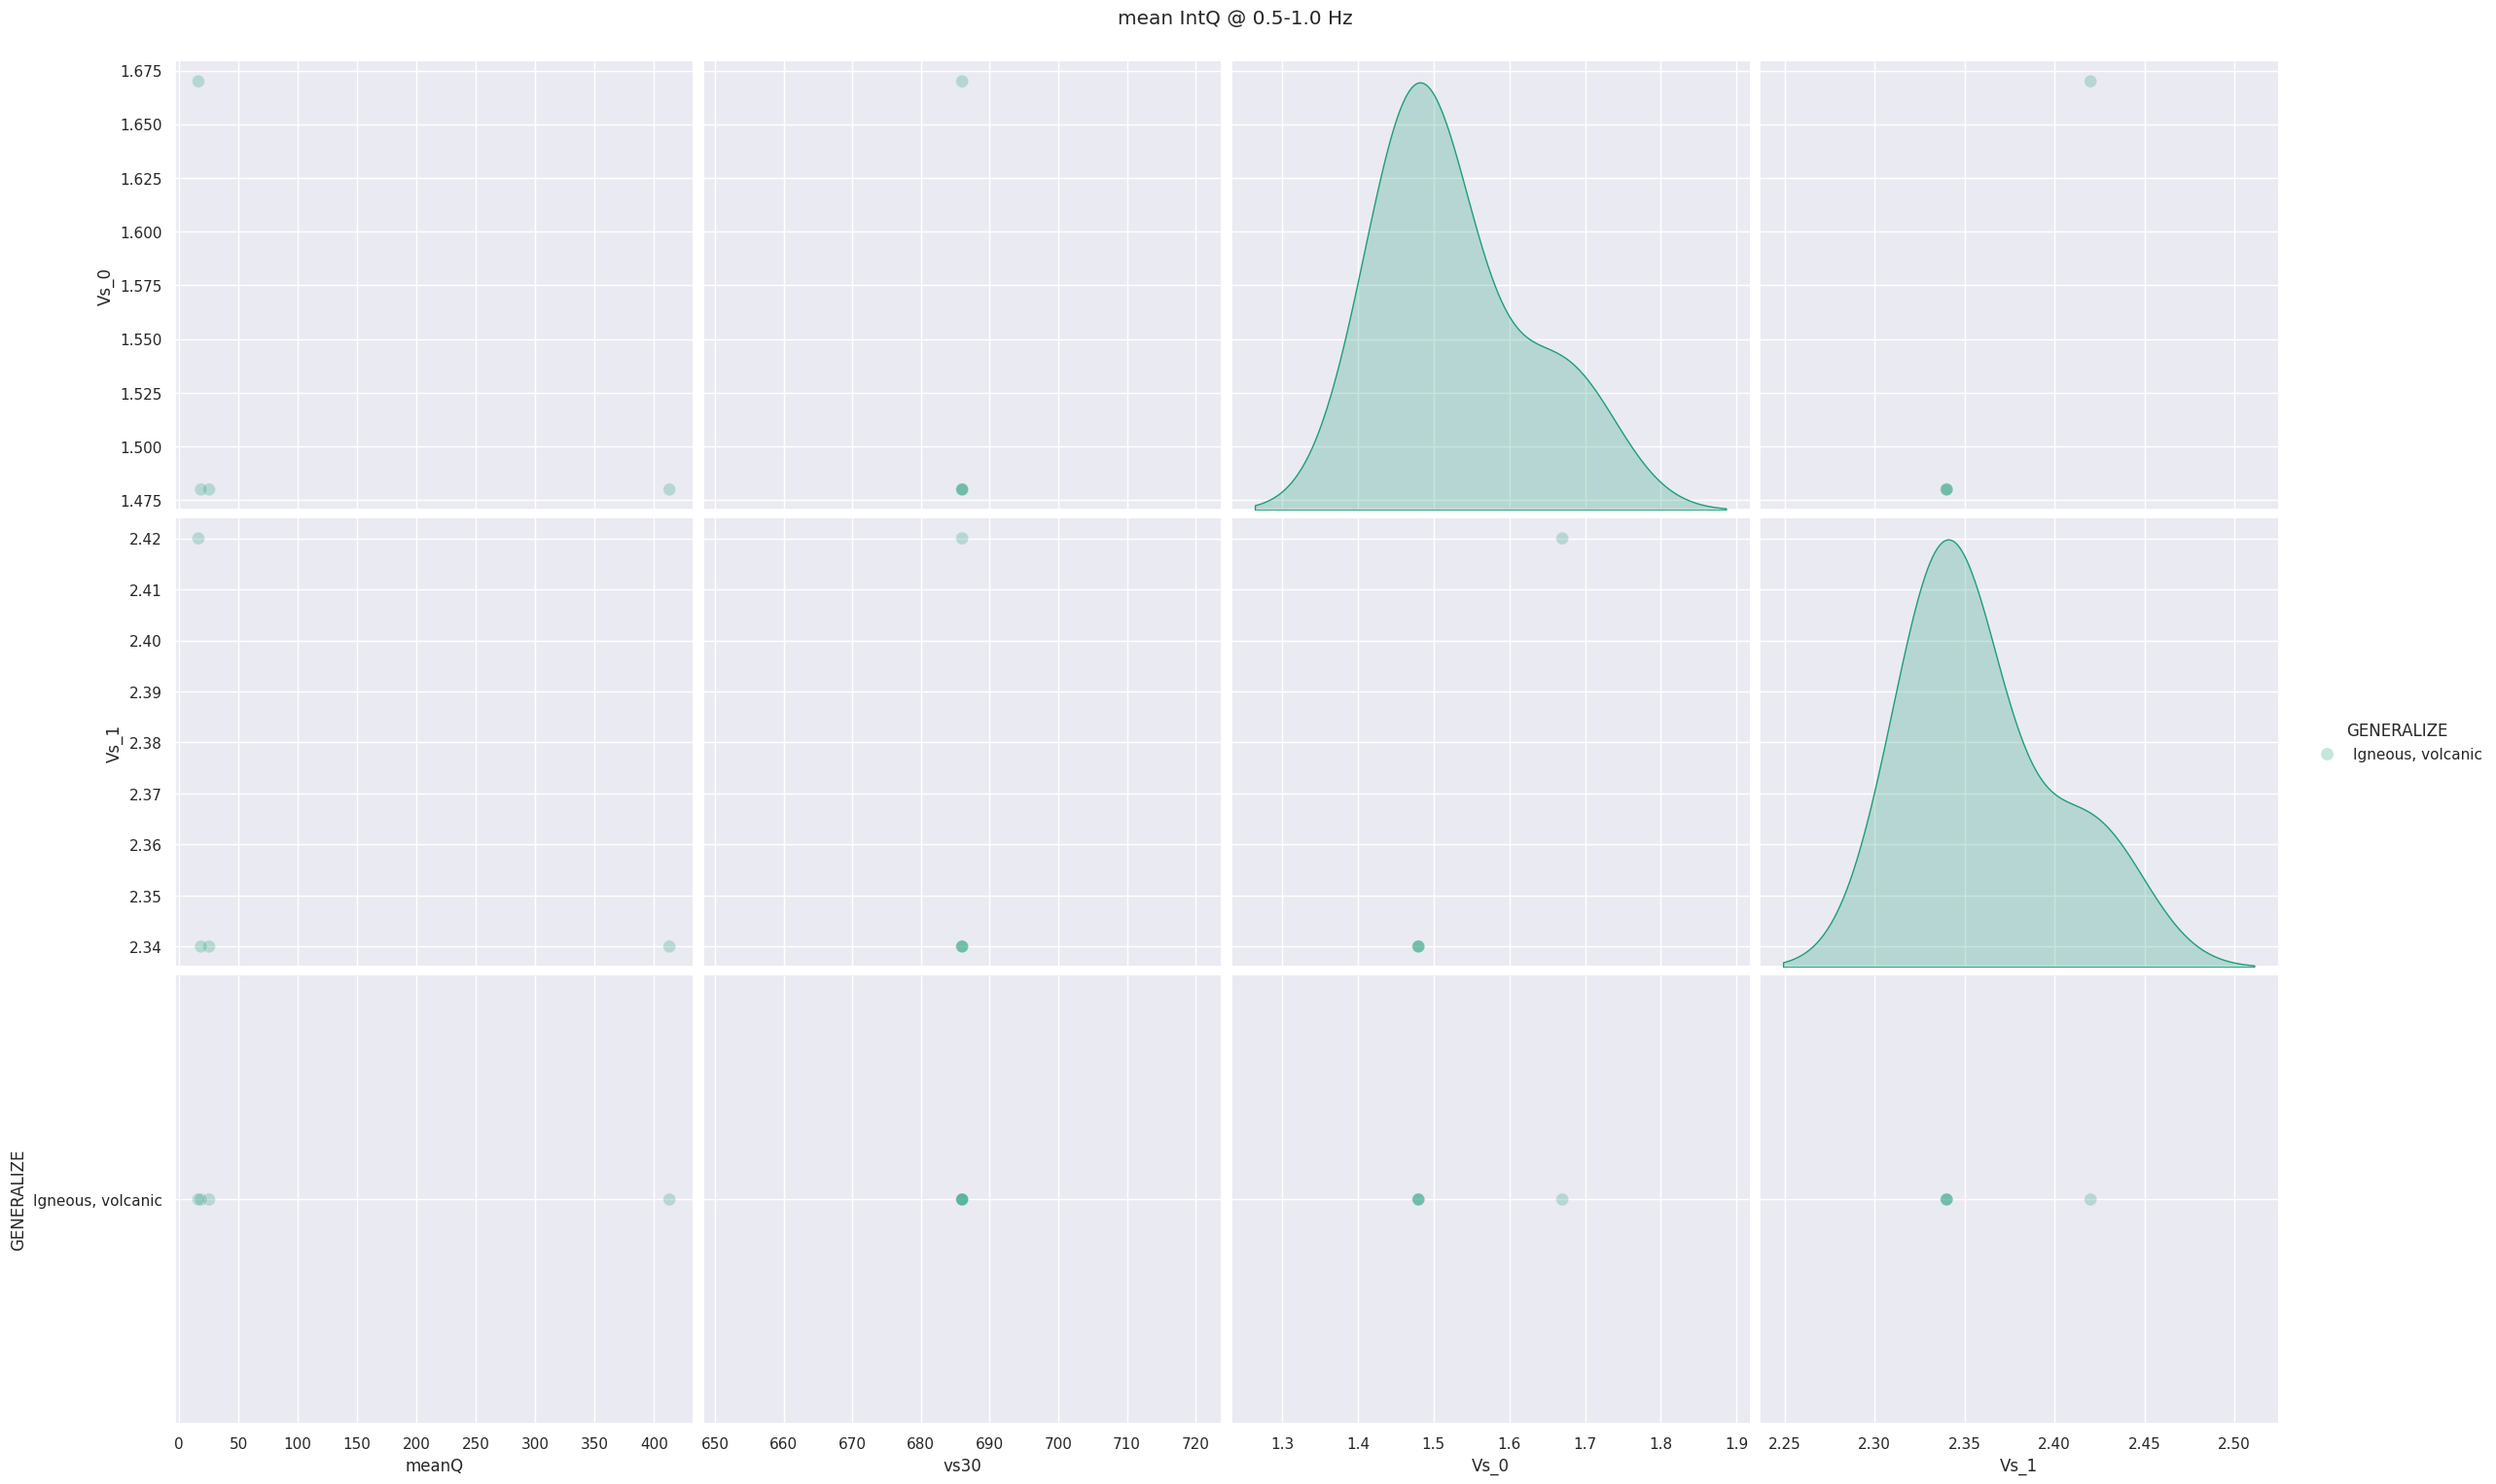

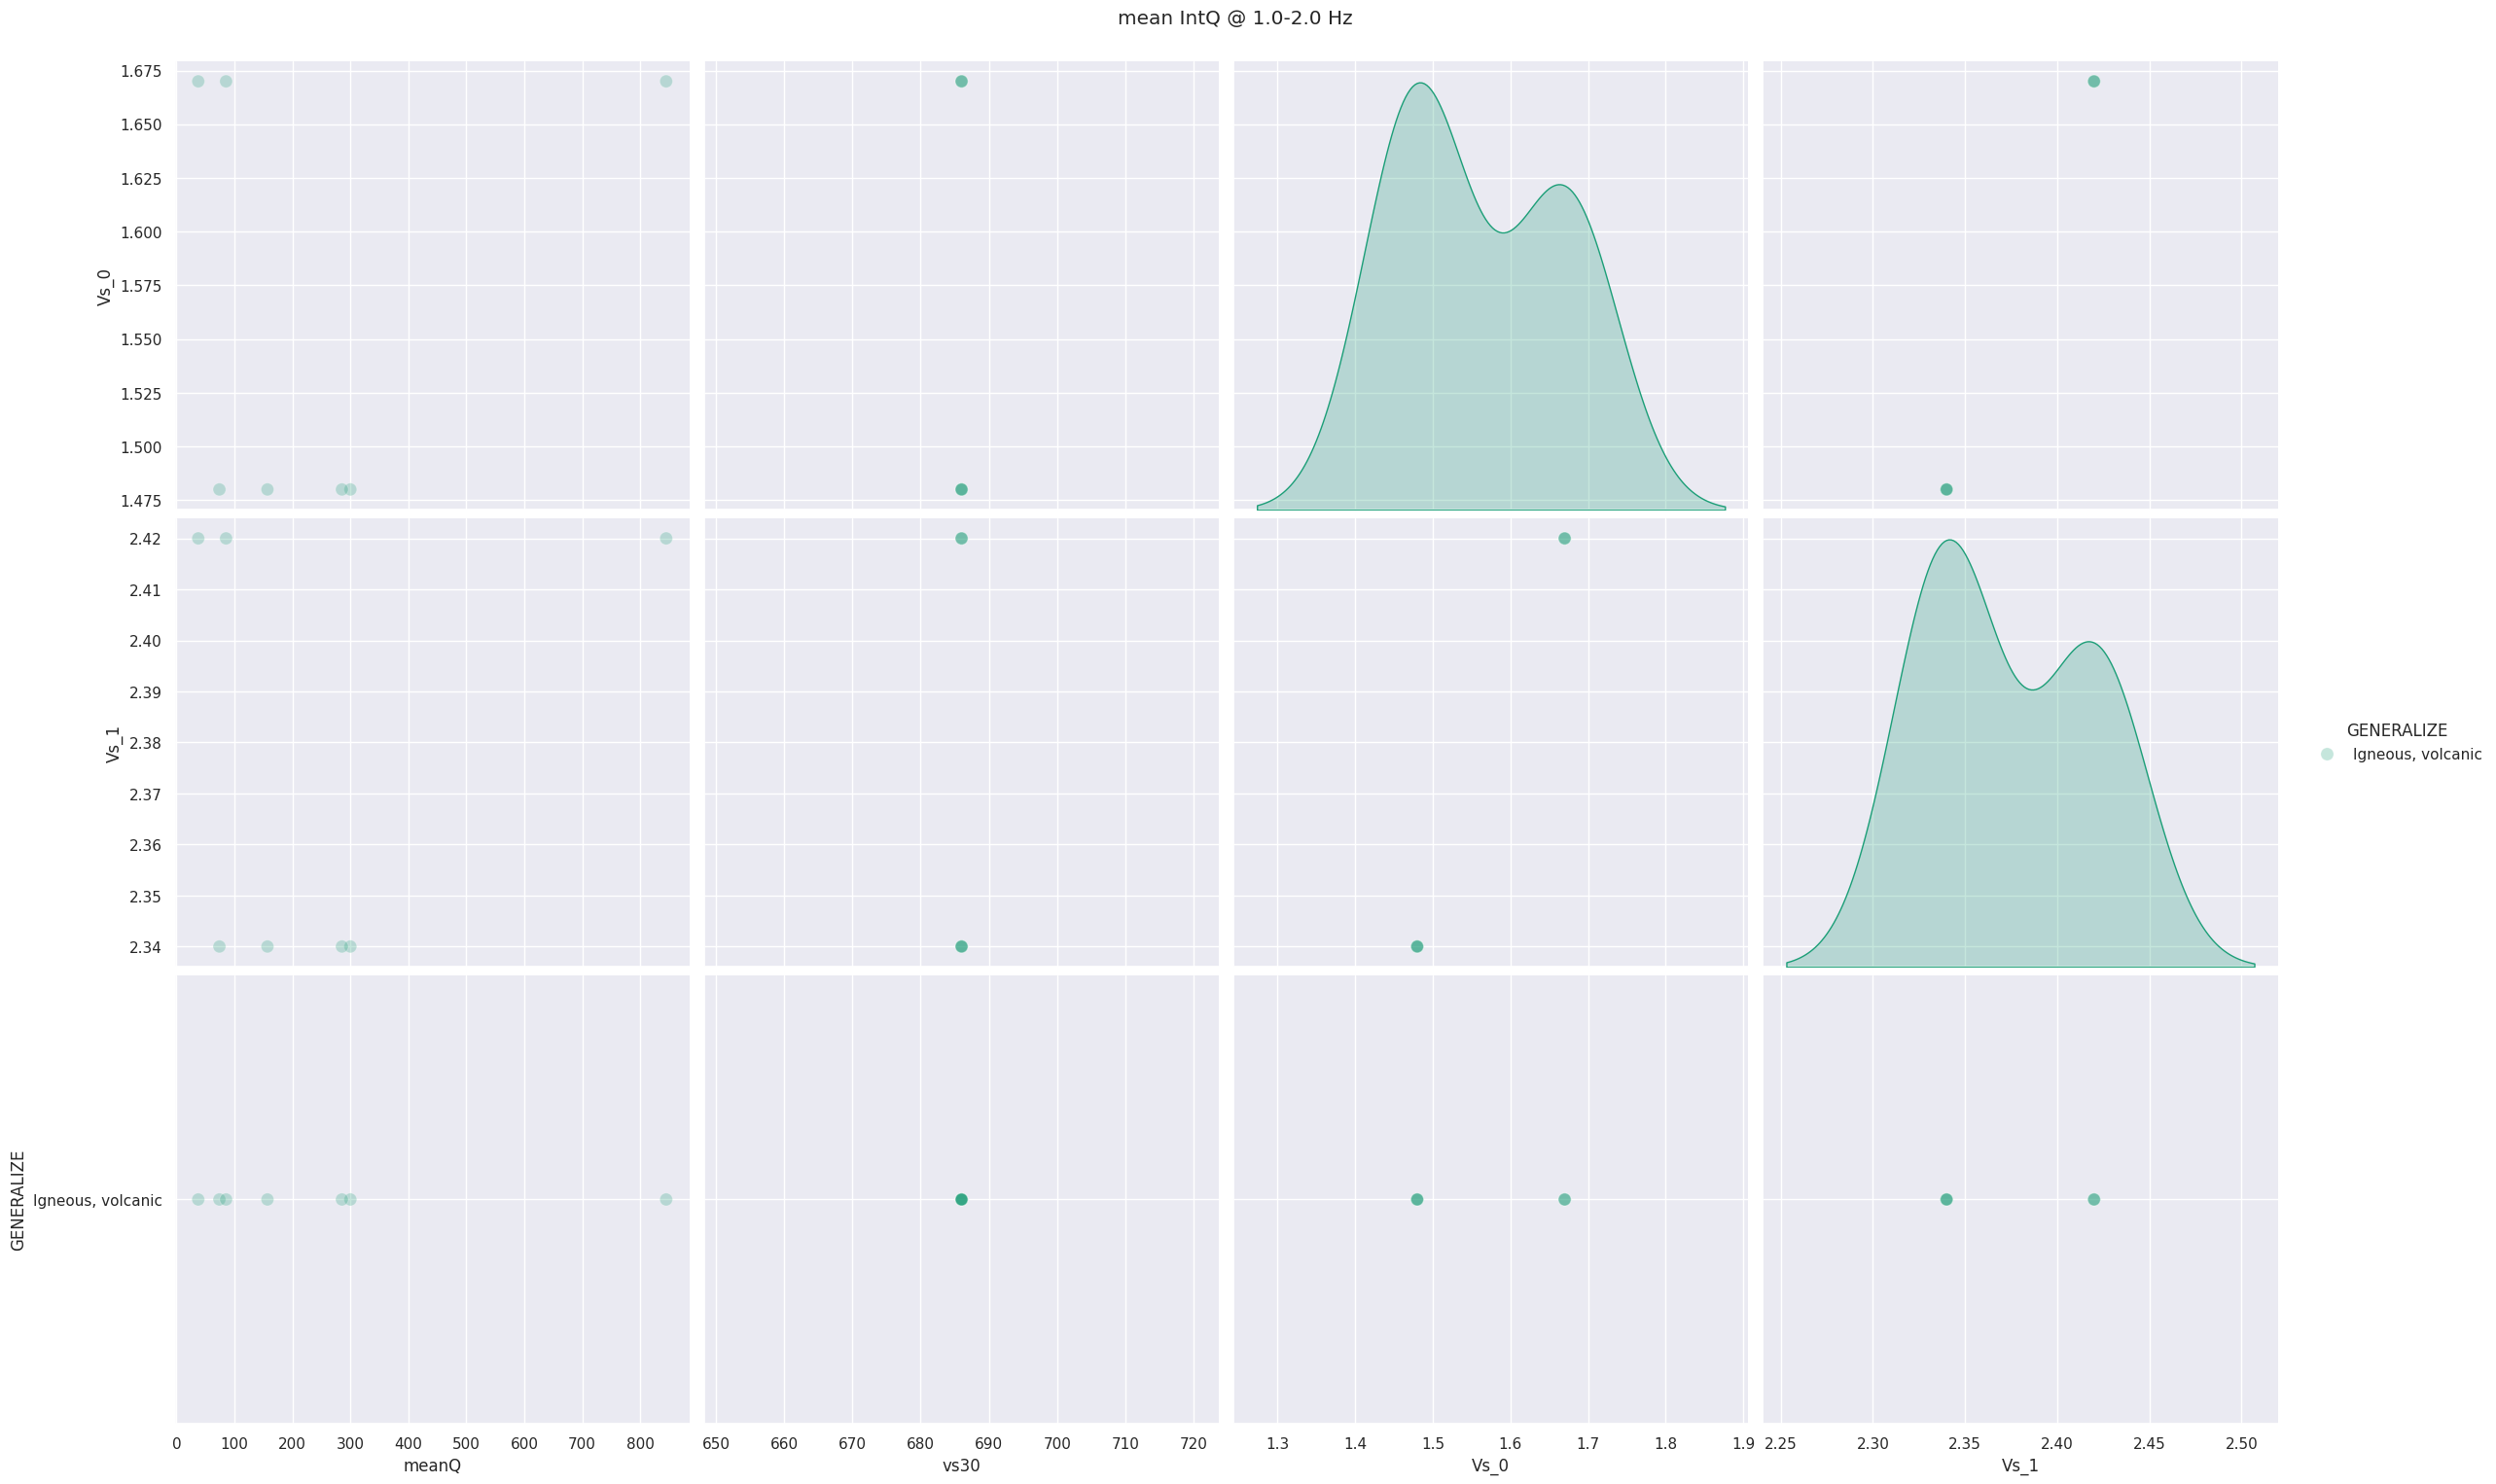

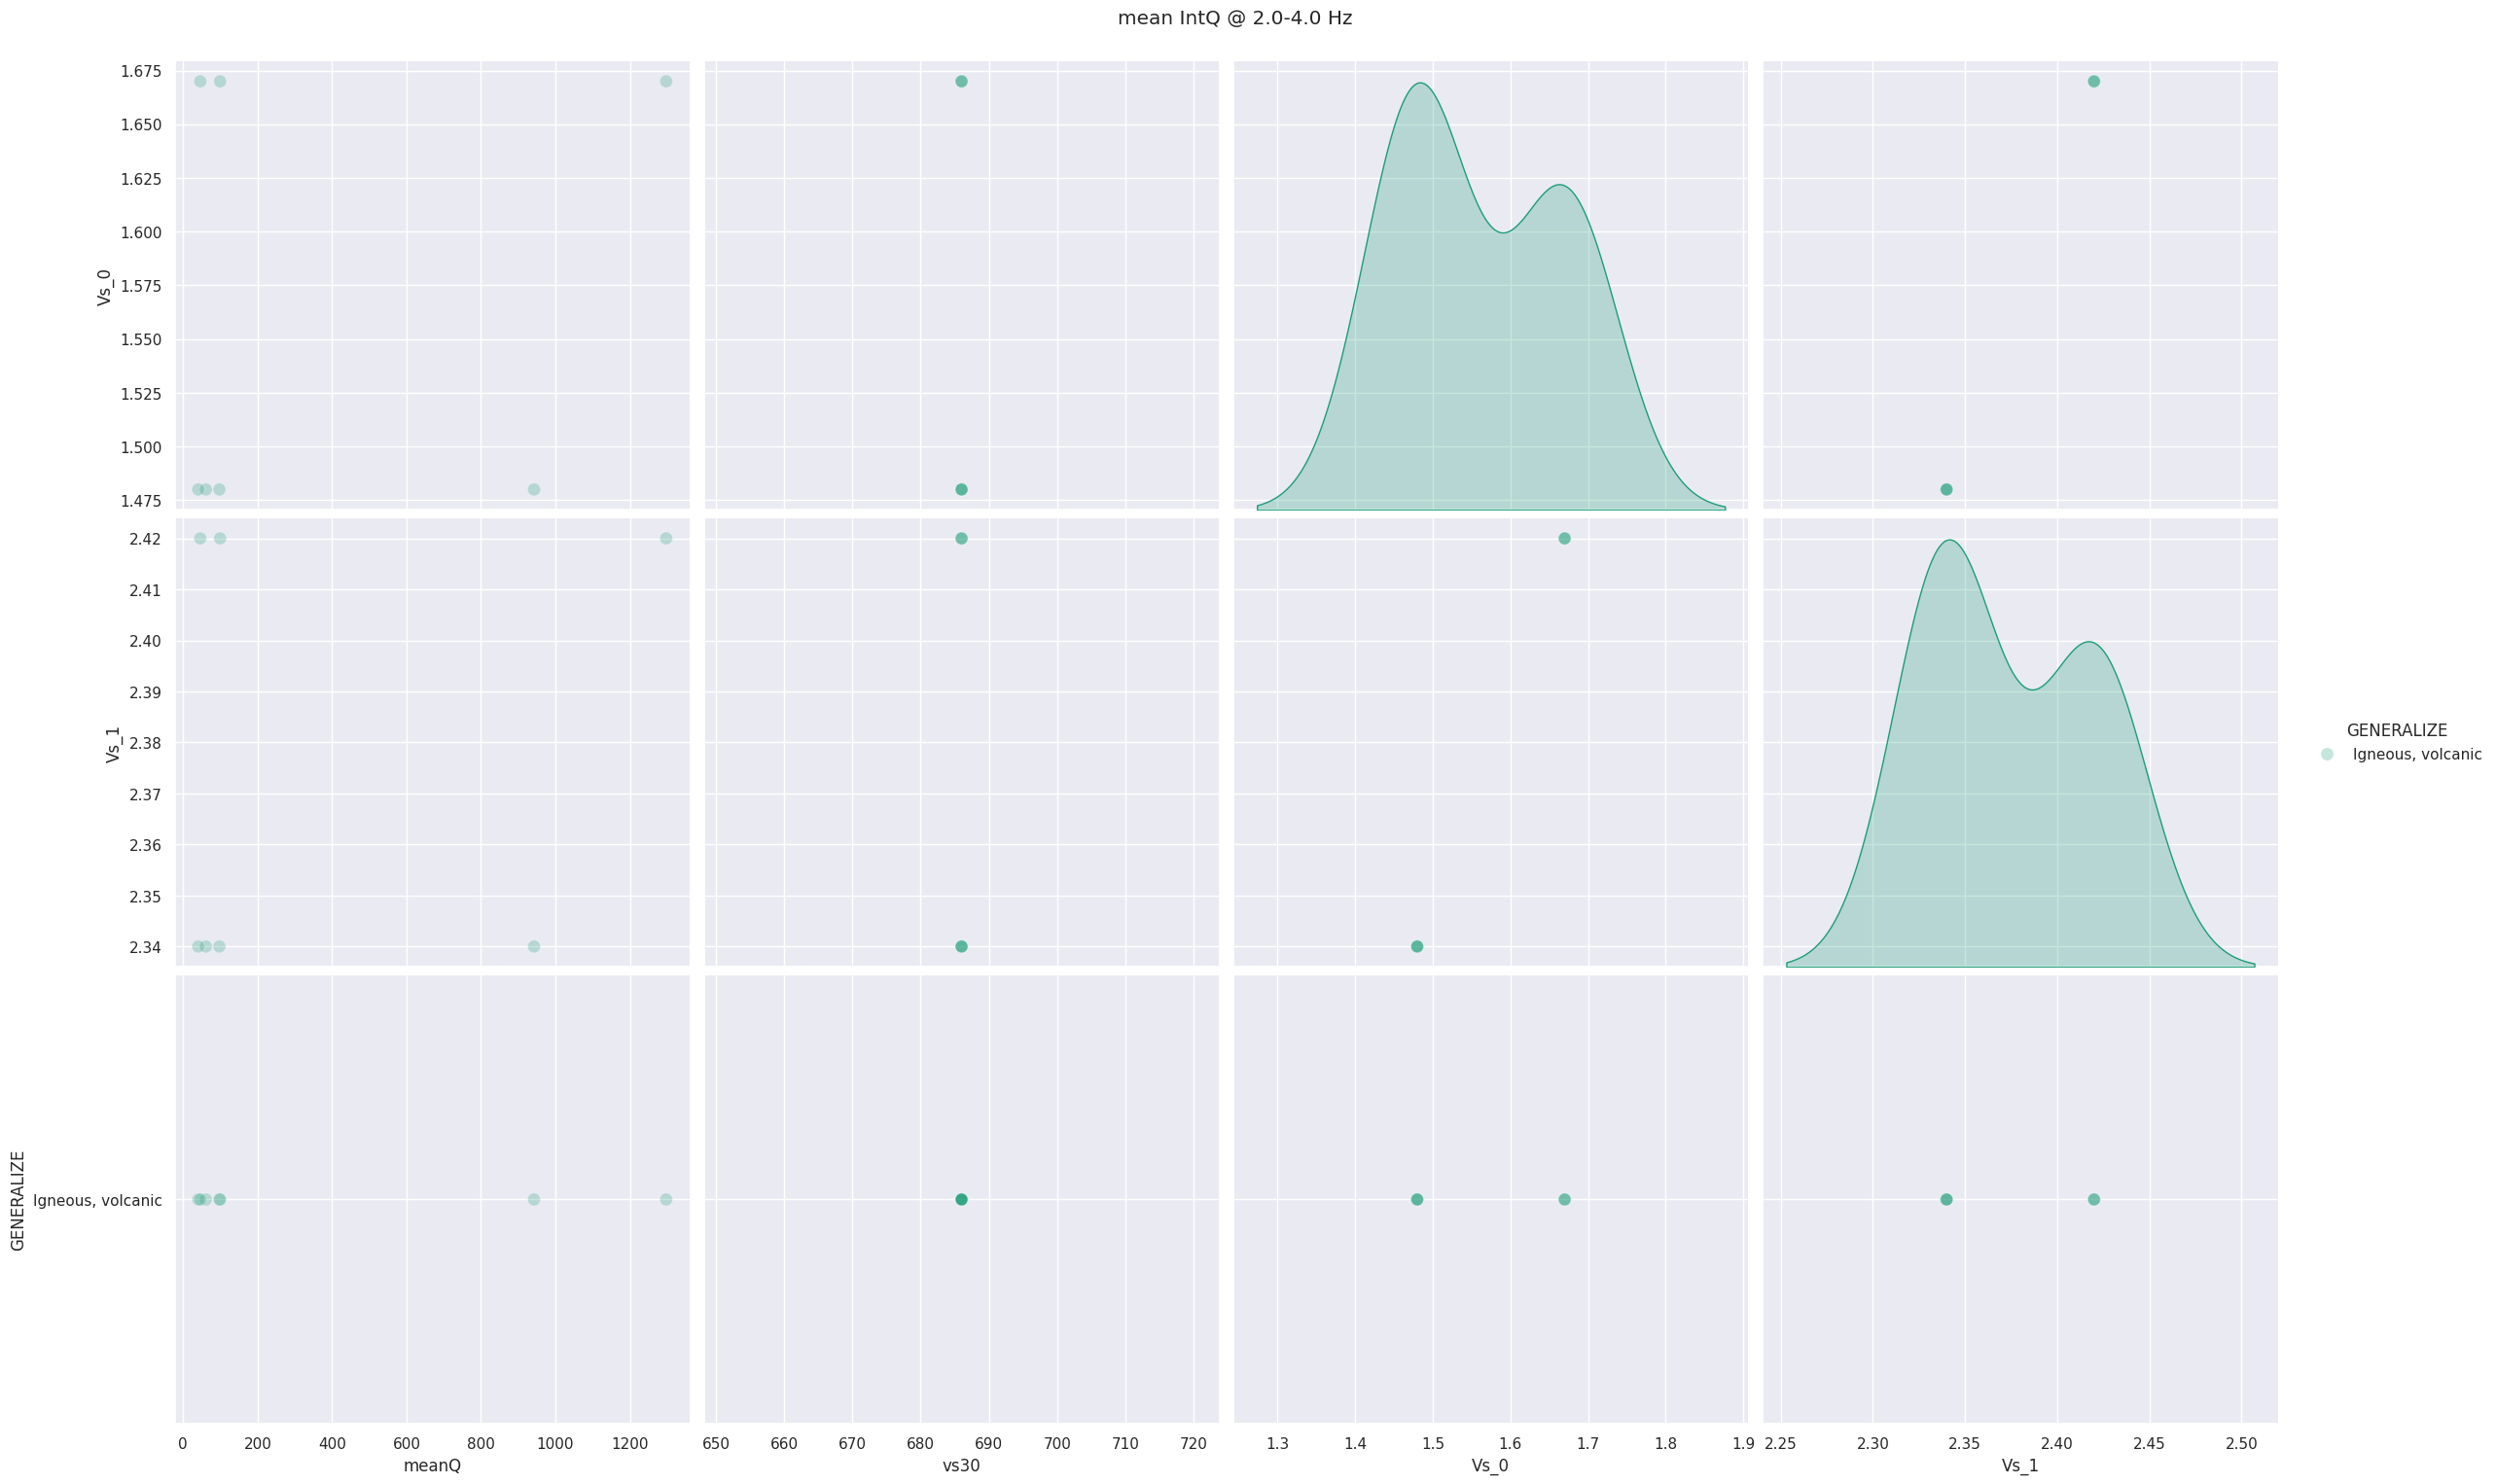

In [ ]:
for fb in merged_geo['fband'].unique():
    data_geo = merged_geo[merged_geo['fband'] == fb]
    sns.pairplot(data=data_geo,
                x_vars=["meanQ","vs30",'Vs_0','Vs_1'] ,
                y_vars=['Vs_0','Vs_1',"GENERALIZE"],
                hue='GENERALIZE', diag_kind='kde', plot_kws={'alpha':0.25, 's':90, }, 
                hue_order=geo_filtered['GENERALIZE'].value_counts().index,
                palette="Dark2",
                height=5, aspect=1.2,
                )
    plt.suptitle(f"mean IntQ @ {fb} Hz", y=1.02) 

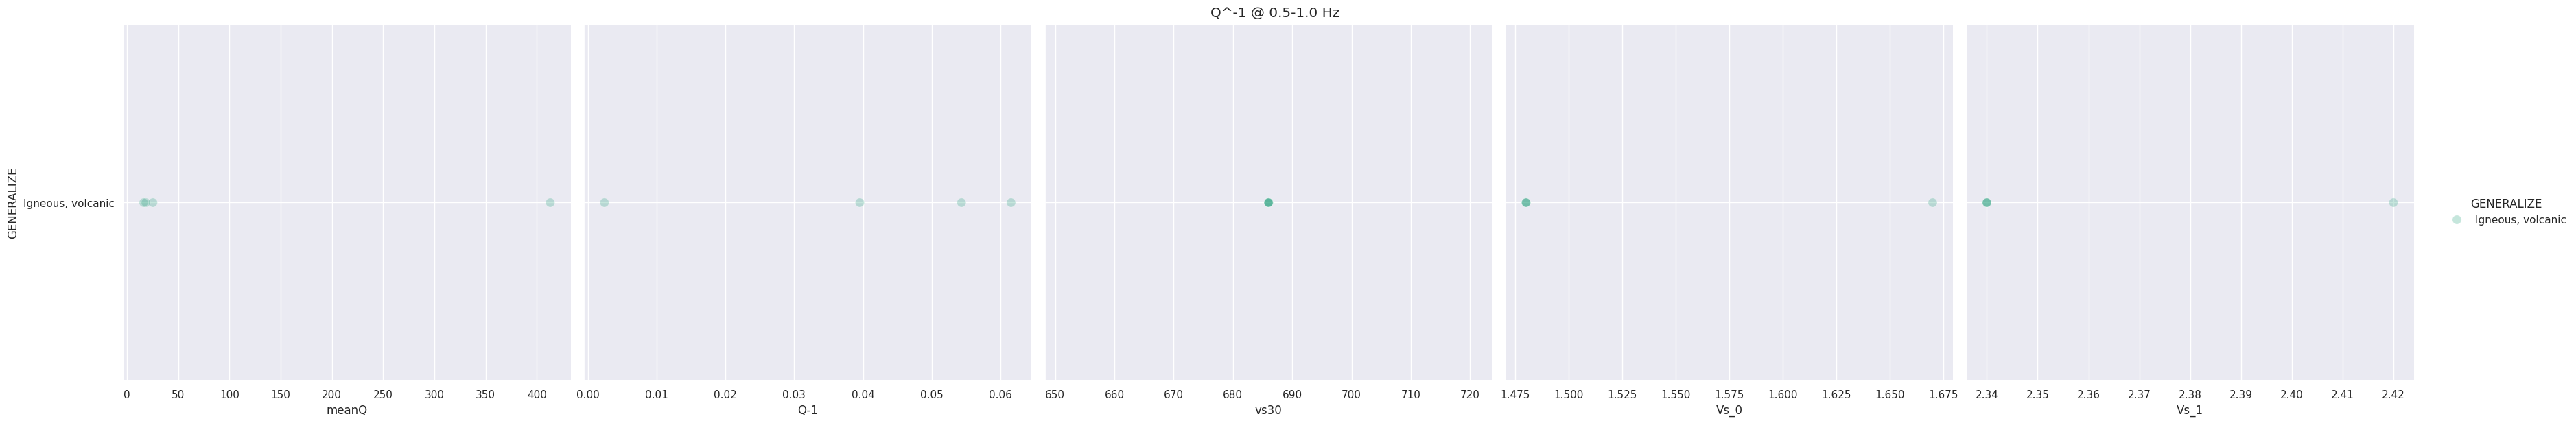

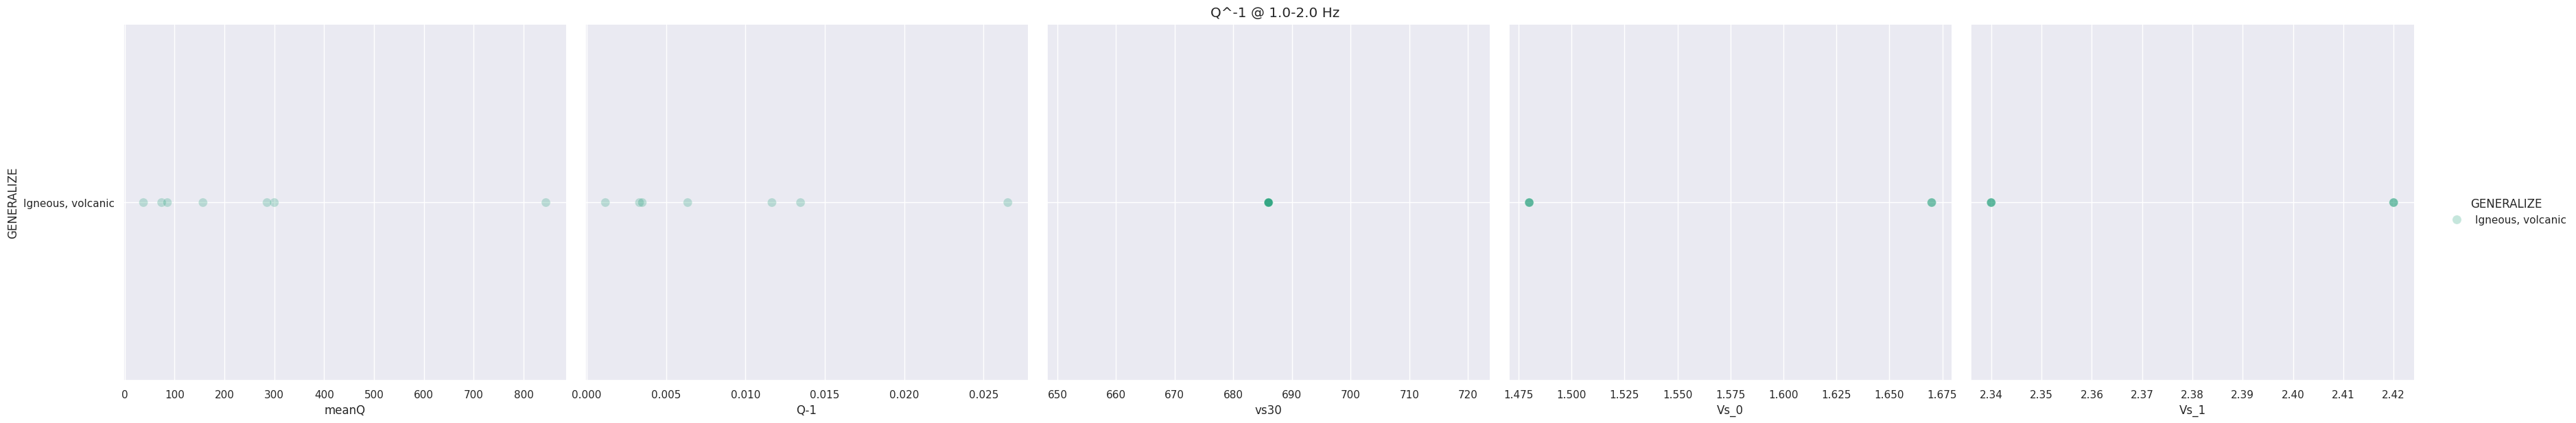

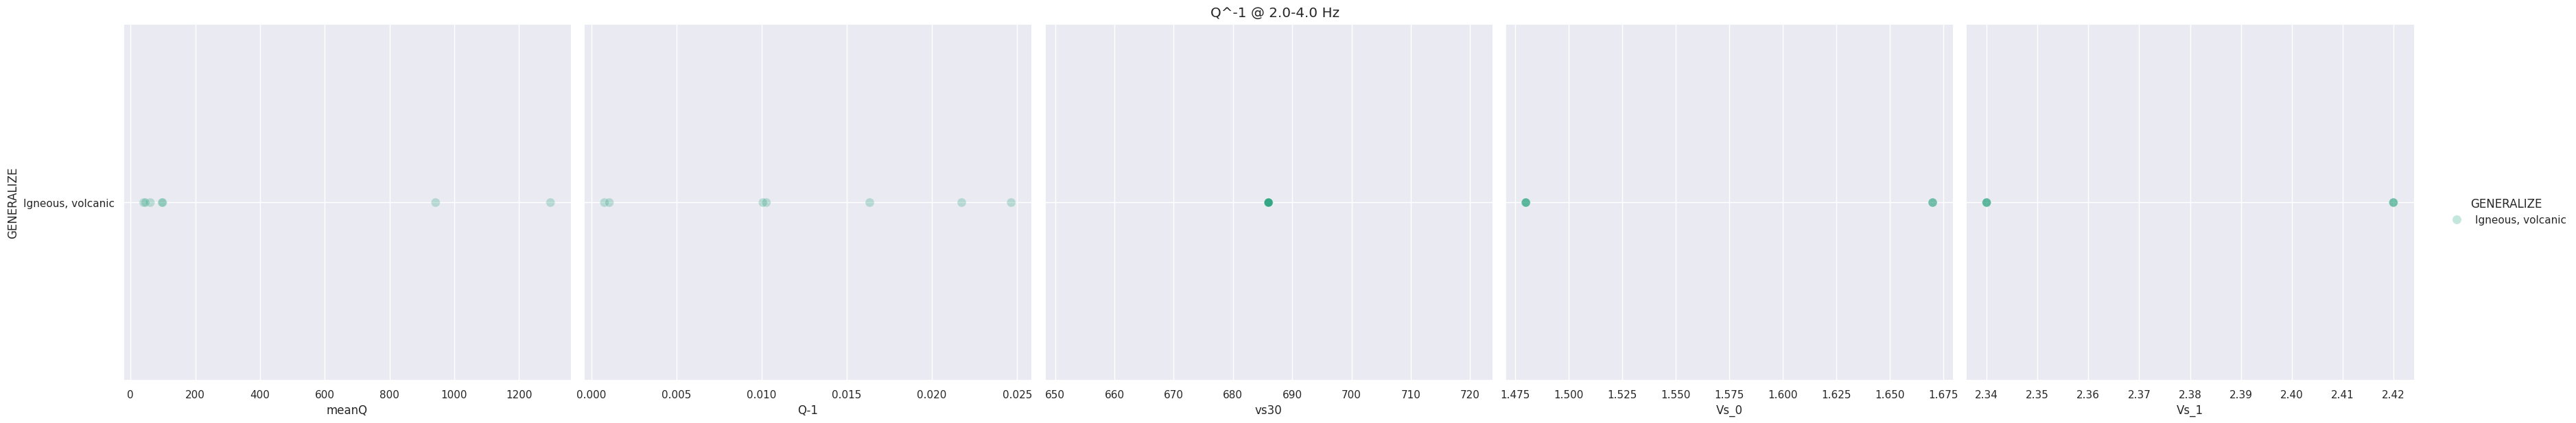

In [ ]:
for fb in merged_geo['fband'].unique():
    data_geo = merged_geo[merged_geo['fband'] == fb]
    sns.pairplot(data=data_geo,
                x_vars=["meanQ","Q-1","vs30",'Vs_0','Vs_1'] ,
                y_vars=["GENERALIZE"],
                hue='GENERALIZE', diag_kind='kde', plot_kws={'alpha':0.25, 's':90, }, 
                palette="Dark2",
                height=6, aspect=1.2,
                )
    plt.suptitle(f"Q^-1 @ {fb} Hz", y=1.02) 

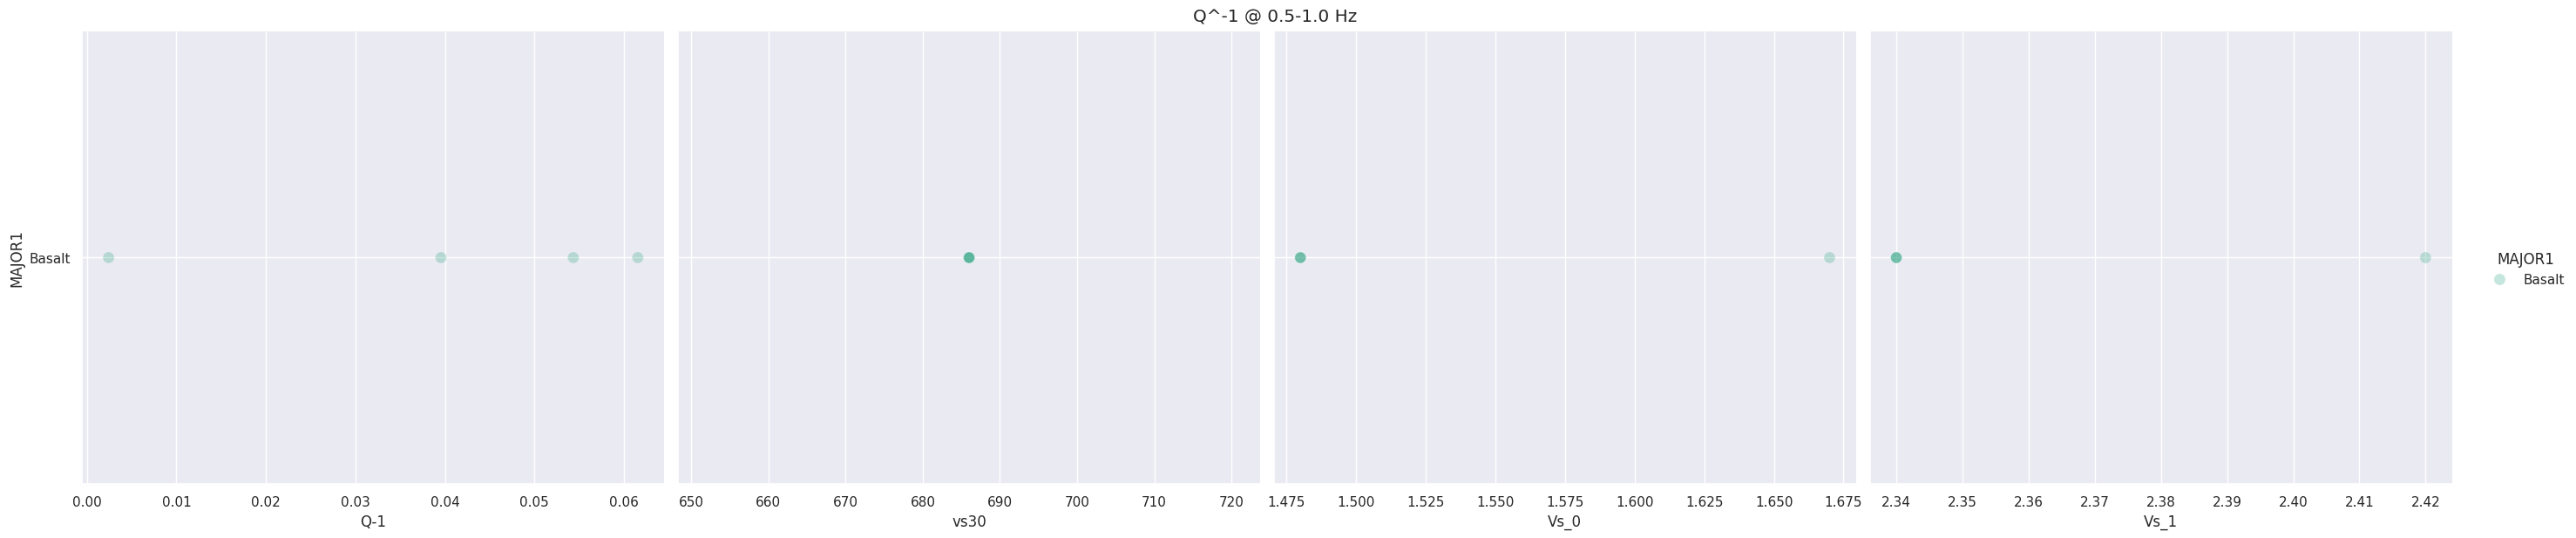

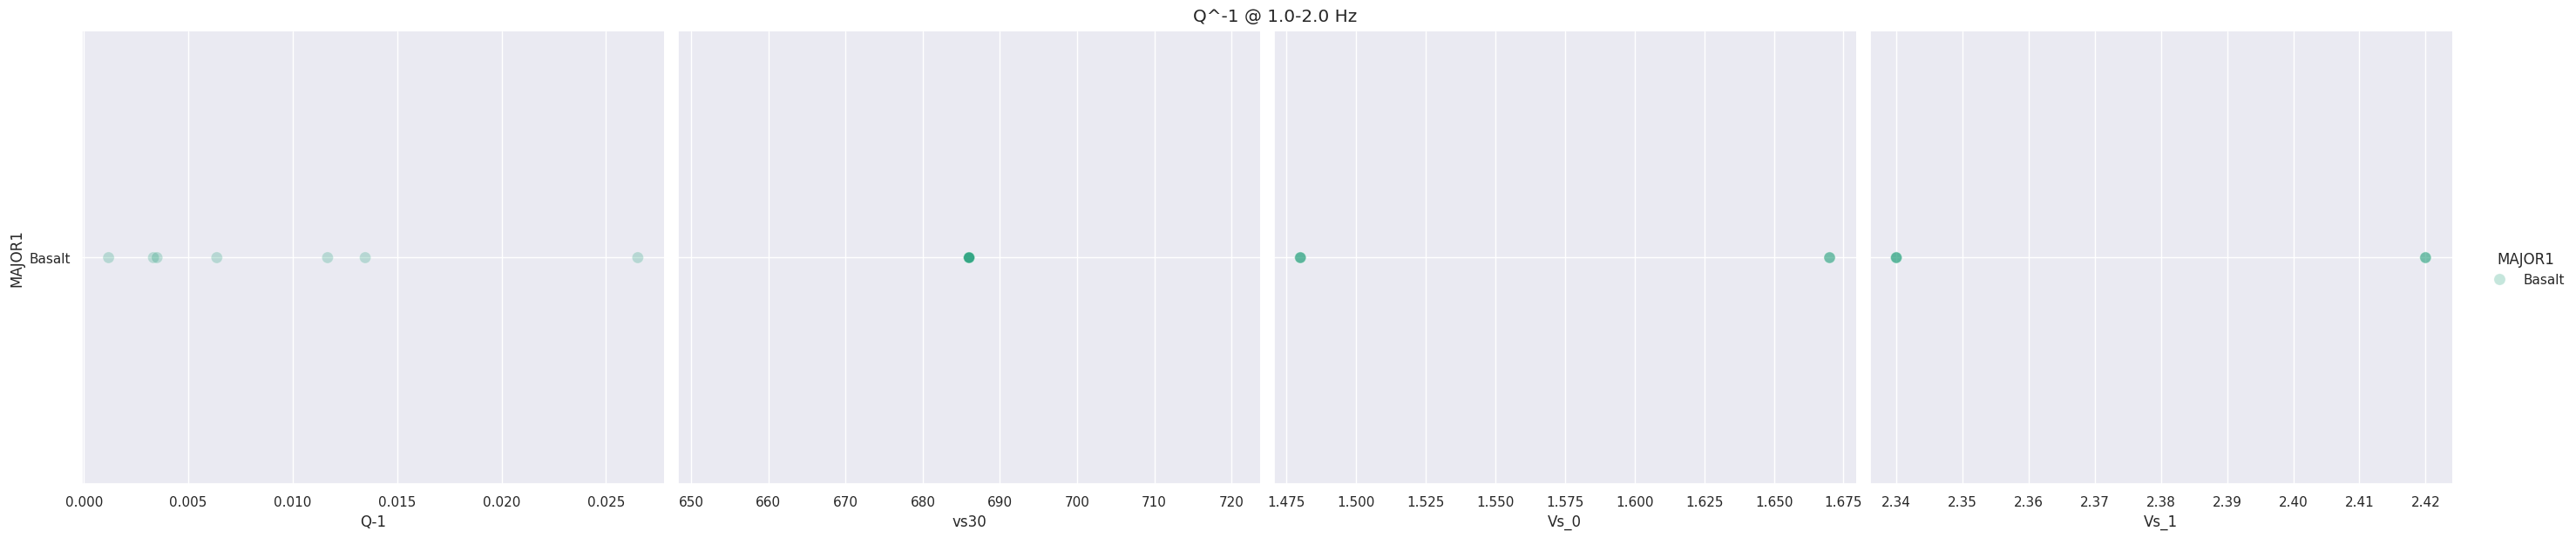

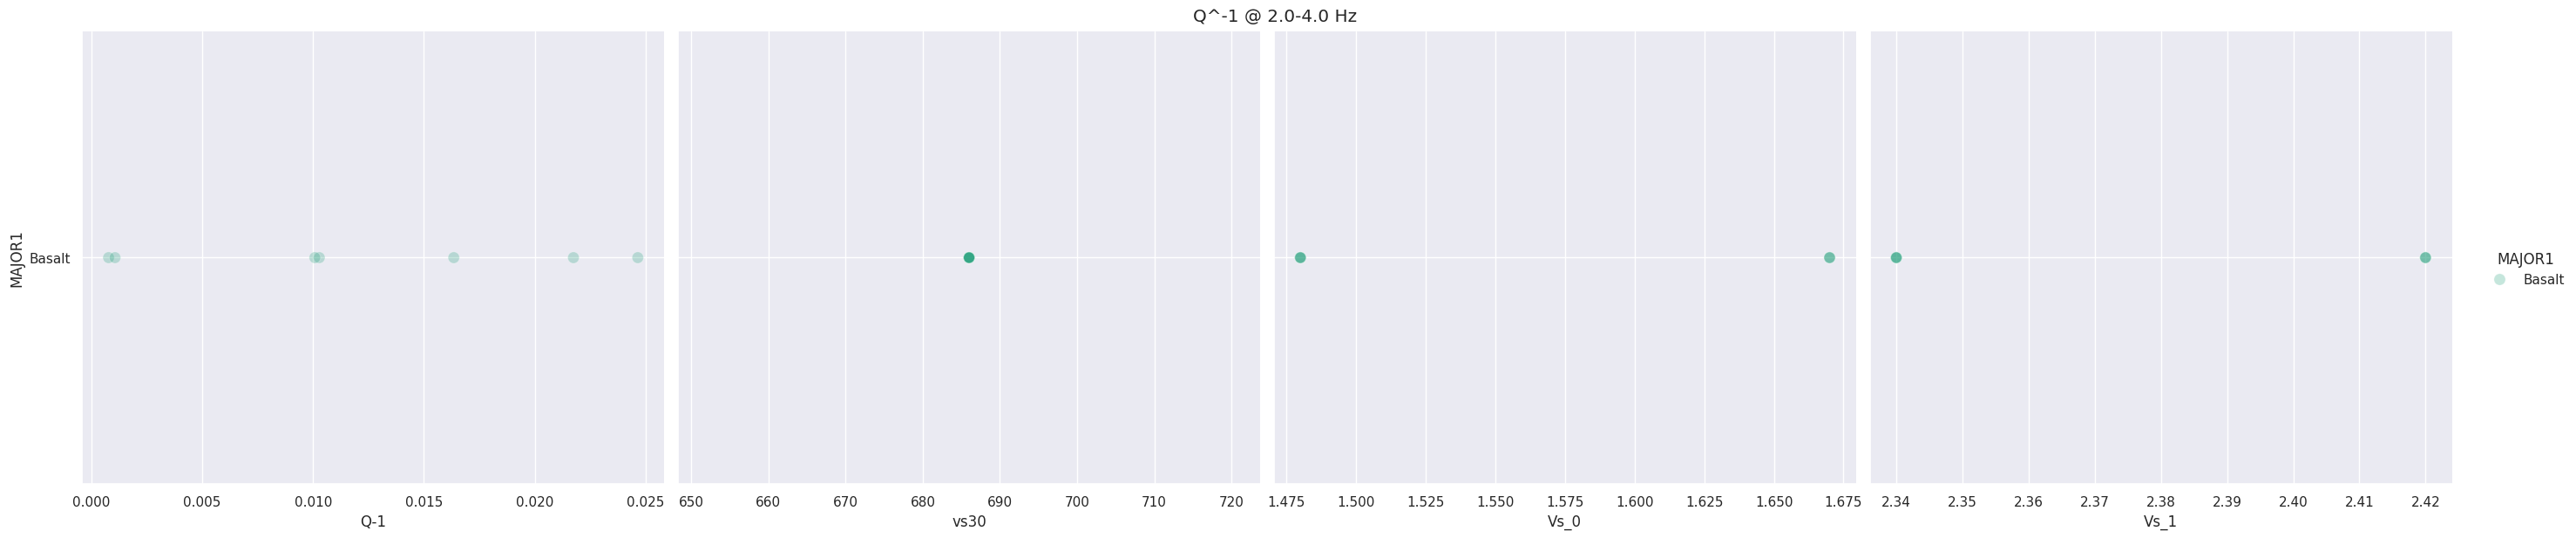

In [ ]:
for fb in merged_geo['fband'].unique():
    data_geo = merged_geo[merged_geo['fband'] == fb]
    sns.pairplot(data=data_geo,
                x_vars=["Q-1","vs30",'Vs_0','Vs_1'] ,
                y_vars=["MAJOR1"],
                hue='MAJOR1', diag_kind='kde', plot_kws={'alpha':0.25, 's':90, }, 
                palette="Dark2",
                height=6, aspect=1.2,
                )
    plt.suptitle(f"Q^-1 @ {fb} Hz", y=1.02) 

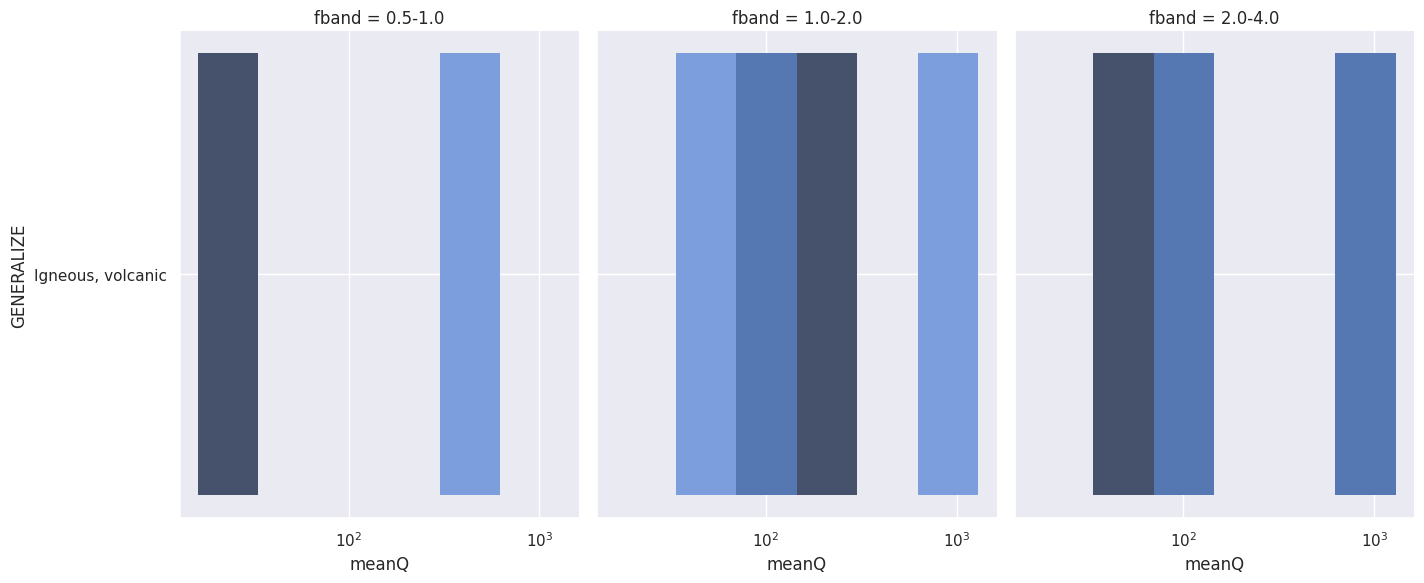

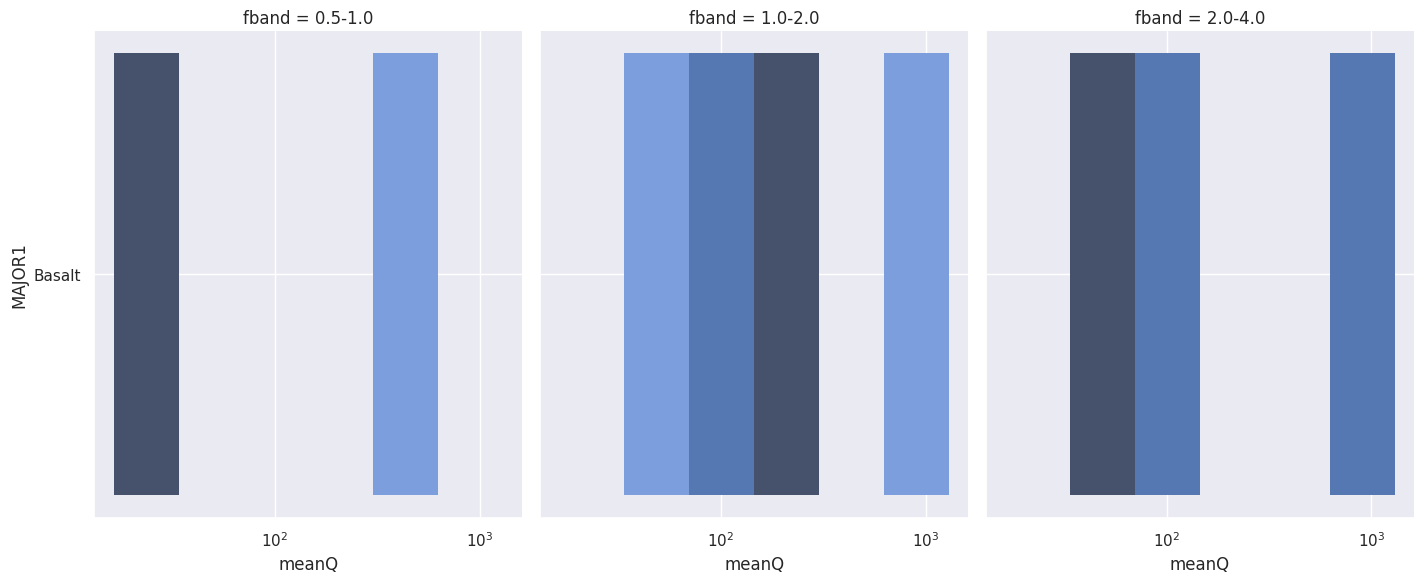

In [ ]:

sns.set_theme()
sns.displot(
    data=merged_geo, x="meanQ", y="GENERALIZE", col="fband",
    log_scale=(True, False), col_wrap=3, height=6, aspect=.8,
)
sns.displot(
    data=merged_geo, x="meanQ", y="MAJOR1", col="fband",
    log_scale=(True, False), col_wrap=3, height=6, aspect=.8,
)